In [1]:
import numpy as np

In [2]:
def read_dic(path, aniso=False):
    dictionary = np.load(path, allow_pickle=True)
    t = np.real(dictionary.item()["t"])
    f = np.real(dictionary.item()["f"])
    R1 = np.real(dictionary.item()["R1"])
    R2 = np.real(dictionary.item()["R2"])
    if aniso:
        C1 = np.real(dictionary.item()["C1"])
        C2 = np.real(dictionary.item()["C2"])
        C3 = np.real(dictionary.item()["C3"])
        return t, f, C1, C2, C3, R1, R2
    else:
        C = np.real(dictionary.item()["C"])
        return t, f, C, R1, R2

In [3]:
def append_data(t, f, gij, R1, R2, all_t, all_f, all_gij, all_R1, all_R2):
    all_t.append(t)
    all_f.append(f)
    all_gij.append(gij)
    all_R1.append(R1)
    all_R2.append(R2)
    return all_t, all_f, all_gij, all_R1, all_R2

In [4]:
def extract_R0(R1_vs_x):
    R10_vs_x = []
    for R1 in R1_vs_x:
        R10_vs_x.append(np.mean(R1[0]))
    R10_vs_x = np.float32(R10_vs_x)
    return R10_vs_x

In [5]:
import sys, os, git
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/examples/shared/pyplot-perso/")
from color_series1 import colors
from functions import complete_panel, save_figure, set_boundaries, add_subplotlabels, set_boundaries
path_figures = "/docs/source/figures/illustrations/bulk-water/"

In [6]:
from matplotlib import pyplot as plt

# Varying temperature

In [7]:
Krynicki66 = np.loadtxt("bulk-water/literature_data/T1_vs_T_Krynicki66a.dat")
svirmickas73 = np.loadtxt("bulk-water/literature_data/T1_vs_T_svirmickas73a.dat")

In [8]:
all_T = []
R1_intra_vs_T = []
R2_intra_vs_T = []
gij_intra_vs_T = []
f_vs_T = []
t_vs_T = []
R1_inter_vs_T = []
R2_inter_vs_T = []
gij_inter_vs_T = []
for T in ["T280K", "T290K", "T300K", "T310K", "T320K"]:
    t, f, gij, R1, R2 = read_dic("bulk-water-tip4p-vs-temperature/raw_data/N4000_intra_"+T+".npy")
    t_vs_T, f_vs_T, gij_intra_vs_T, R1_intra_vs_T, R2_intra_vs_T = append_data(t, f, gij, R1, R2, t_vs_T, f_vs_T, gij_intra_vs_T, R1_intra_vs_T, R2_intra_vs_T)
    t, f, gij, R1, R2 = read_dic("bulk-water-tip4p-vs-temperature/raw_data/N4000_inter_"+T+".npy")
    t_vs_T, f_vs_T, gij_inter_vs_T, R1_inter_vs_T, R2_inter_vs_T = append_data(t, f, gij, R1, R2, [], [], gij_inter_vs_T, R1_inter_vs_T, R2_inter_vs_T)
    all_T.append(np.int32(T[1:-1]))
all_T = np.array(all_T)
R10_inter_vs_T = extract_R0(R1_inter_vs_T)
R20_inter_vs_T = extract_R0(R2_inter_vs_T)
R10_intra_vs_T = extract_R0(R1_intra_vs_T)
R20_intra_vs_T = extract_R0(R2_intra_vs_T)

In [11]:
all_T

array([280, 290, 300, 310, 320], dtype=int32)

In [10]:
1/(R10_inter_vs_T+R10_intra_vs_T)

array([2.093484 , 2.6474411, 3.3786407, 3.9231129, 5.128932 ],
      dtype=float32)

In [10]:
all_T2 = []
R1_intra_vs_T2 = []
R2_intra_vs_T2 = []
gij_intra_vs_T2 = []
f_vs_T2 = []
t_vs_T2 = []
R1_inter_vs_T2 = []
R2_inter_vs_T2 = []
gij_inter_vs_T2 = []
for T in ["T280K", "T290K", "T300K", "T310K", "T320K"]:
    t, f, gij, R1, R2 = read_dic("bulk-water-spce-vs-temperature/raw_data/N4000_intra_"+T+".npy")
    t_vs_T, f_vs_T2, gij_intra_vs_T2, R1_intra_vs_T2, R2_intra_vs_T2 = append_data(t, f, gij, R1, R2, t_vs_T2, f_vs_T2, gij_intra_vs_T2, R1_intra_vs_T2, R2_intra_vs_T2)    
    t, f, gij, R1, R2 = read_dic("bulk-water-tip3p-vs-temperature/raw_data/N4000_inter_"+T+".npy")
    t_vs_T, f_vs_T2, gij_inter_vs_T2, R1_inter_vs_T2, R2_inter_vs_T2 = append_data(t, f, gij, R1, R2, [], [], gij_inter_vs_T2, R1_inter_vs_T2, R2_inter_vs_T2)
    try:
        all_T2.append(np.int32(T[1:-1]))
    except:
        all_T2.append(300)
all_T2 = np.array(all_T2)
R10_inter_vs_T2 = extract_R0(R1_inter_vs_T2)
R20_inter_vs_T2 = extract_R0(R2_inter_vs_T2)
R10_intra_vs_T2 = extract_R0(R1_intra_vs_T2)
R20_intra_vs_T2 = extract_R0(R2_intra_vs_T2)

In [11]:
all_T3 = []
R1_intra_vs_T3 = []
R2_intra_vs_T3 = []
gij_intra_vs_T3 = []
f_vs_T3 = []
t_vs_T3 = []
R1_inter_vs_T3 = []
R2_inter_vs_T3 = []
gij_inter_vs_T3 = []
for T in ["T280K", "T290K", "T300K", "T310K", "T320K"]:
    t, f, gij, R1, R2 = read_dic("bulk-water-tip3p-vs-temperature/raw_data/N4000_intra_"+T+".npy")
    t_vs_T, f_vs_T3, gij_intra_vs_T3, R1_intra_vs_T3, R2_intra_vs_T3 = append_data(t, f, gij, R1, R2, t_vs_T3, f_vs_T3, gij_intra_vs_T3, R1_intra_vs_T3, R2_intra_vs_T3)    
    t, f, gij, R1, R2 = read_dic("bulk-water-tip3p-vs-temperature/raw_data/N4000_inter_"+T+".npy")
    t_vs_T, f_vs_T3, gij_inter_vs_T3, R1_inter_vs_T3, R2_inter_vs_T3 = append_data(t, f, gij, R1, R2, [], [], gij_inter_vs_T3, R1_inter_vs_T3, R2_inter_vs_T3)
    try:
        all_T3.append(np.int32(T[1:-1]))
    except:
        all_T3.append(300)
all_T3 = np.array(all_T3)
R10_inter_vs_T3 = extract_R0(R1_inter_vs_T3)
R20_inter_vs_T3 = extract_R0(R2_inter_vs_T3)
R10_intra_vs_T3 = extract_R0(R1_intra_vs_T3)
R20_intra_vs_T3 = extract_R0(R2_intra_vs_T3)

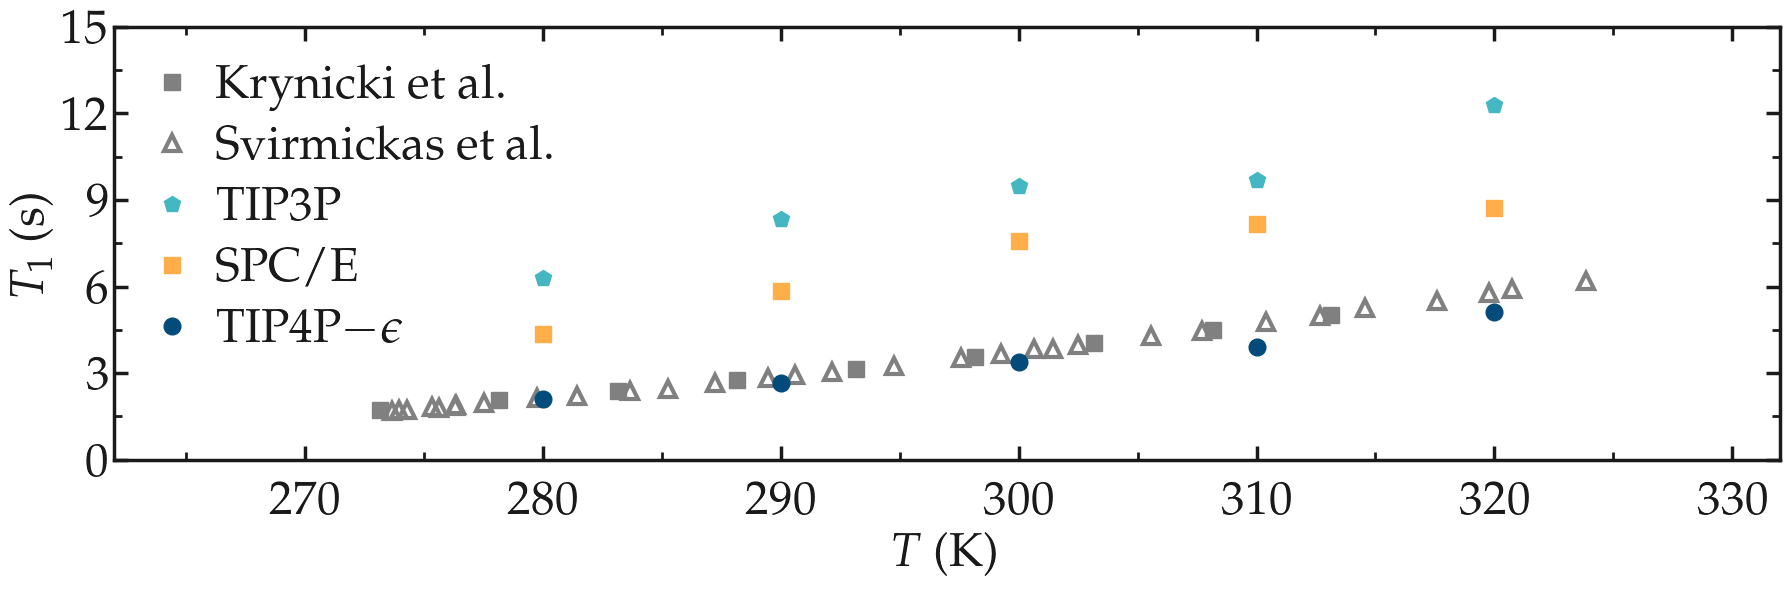

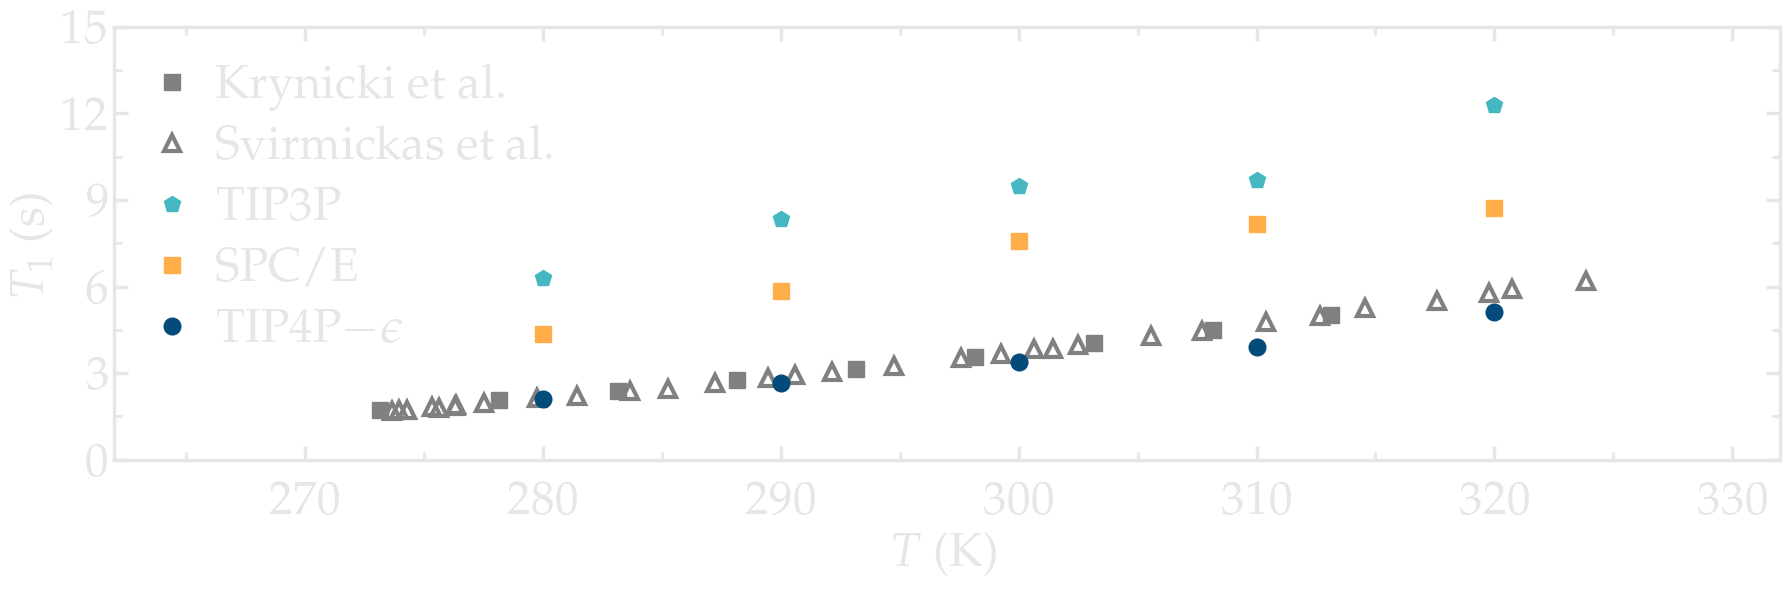

In [12]:
filename = "experimental_comparison"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(Krynicki66.T[0]+273.15, Krynicki66.T[1], "s", color=colors["mygray"],
                markersize = 12, linewidth=4, label=r'Krynicki et al.')
    ax[-1].plot(svirmickas73.T[0]+273.15, svirmickas73.T[1], "^", # color=colors["mygray"],
                markersize = 12, linewidth=4, label=r'Svirmickas et al.',
                markeredgewidth=3, markeredgecolor=colors["mygray"],markerfacecolor='none',)
    ax[-1].plot(all_T3, 1/(R10_inter_vs_T3+R10_intra_vs_T3), "p", color=colors["mycyan"],
                markersize = 12, linewidth=4, label=r'TIP3P')
    ax[-1].plot(all_T2, 1/(R10_inter_vs_T2+R10_intra_vs_T2), "s", color=colors["myorange"],
                markersize = 12, linewidth=4, label=r'SPC/E')
    ax[-1].plot(all_T, 1/(R10_inter_vs_T+R10_intra_vs_T), "o", color=colors["mydarkblue"],
                markersize = 12, linewidth=4, label=r'TIP4P$-\epsilon$')
    complete_panel(ax[-1], r'$T$ (K)', r'$T_1$ (s)',
                   legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(262, 332), y_boundaries=(0, 14), y_ticks=np.arange(0, 15.5, 3))
    # x_ticks=np.arange(-1, 0.2, 0.2)
    # add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename)

# Varying cut-off

In [13]:
all_co = []
R1_intra_vs_co = []
R2_intra_vs_co = []
gij_intra_vs_co = []
tau_intra_vs_co = []
f_vs_co = []
t_vs_co = []
R1_inter_vs_co = []
R2_inter_vs_co = []
gij_inter_vs_co = []
tau_inter_vs_co = []
for cutoff in ["7", "8", "9", "10", "11", "12", "13", "14"]:
    if np.int32(cutoff) < 14:
        t, f, gij, R1, R2 = read_dic("bulk-water-tip4p-vs-cutoff/raw_data/N4000_intra_cutoff"+cutoff+".npy")
        t_vs_T, f_vs_co, gij_intra_vs_co, R1_intra_vs_co, R2_intra_vs_co = append_data(t, f, gij, R1, R2, t_vs_co, f_vs_co, gij_intra_vs_co, R1_intra_vs_co, R2_intra_vs_co)
        tau_intra_vs_co.append(np.trapz(gij_intra_vs_co[-1], t) / gij_intra_vs_co[-1][0])
        t, f, gij, R1, R2 = read_dic("bulk-water-tip4p-vs-cutoff/raw_data/N4000_inter_cutoff"+cutoff+".npy")
        t_vs_co, f_vs_co, gij_inter_vs_co, R1_inter_vs_co, R2_inter_vs_co = append_data(t, f, gij, R1, R2, [], [], gij_inter_vs_co, R1_inter_vs_co, R2_inter_vs_co) 
        tau_inter_vs_co.append(np.trapz(gij_inter_vs_co[-1], t) / gij_inter_vs_co[-1][0])
    else:
        t, f, gij, R1, R2 = read_dic("bulk-water-tip4p-vs-temperature/raw_data/N4000_intra_T300K.npy")
        t_vs_T, f_vs_co, gij_intra_vs_co, R1_intra_vs_co, R2_intra_vs_co = append_data(t, f, gij, R1, R2, t_vs_co, f_vs_co, gij_intra_vs_co, R1_intra_vs_co, R2_intra_vs_co)
        tau_intra_vs_co.append(np.trapz(gij_intra_vs_co[-1], t) / gij_intra_vs_co[-1][0])
        t, f, gij, R1, R2 = read_dic("bulk-water-tip4p-vs-temperature/raw_data/N4000_inter_T300K.npy")
        t_vs_co, f_vs_co, gij_inter_vs_co, R1_inter_vs_co, R2_inter_vs_co = append_data(t, f, gij, R1, R2, [], [], gij_inter_vs_co, R1_inter_vs_co, R2_inter_vs_co) 
        tau_inter_vs_co.append(np.trapz(gij_inter_vs_co[-1], t) / gij_inter_vs_co[-1][0])
    all_co.append(np.int32(cutoff))
all_co = np.array(all_co)
R10_inter_vs_co = extract_R0(R1_inter_vs_co)
R20_inter_vs_co = extract_R0(R2_inter_vs_co)
R10_intra_vs_co = extract_R0(R1_intra_vs_co)
R20_intra_vs_co = extract_R0(R2_intra_vs_co)
tau_intra_vs_co = np.array(tau_intra_vs_co)
tau_inter_vs_co = np.array(tau_inter_vs_co)

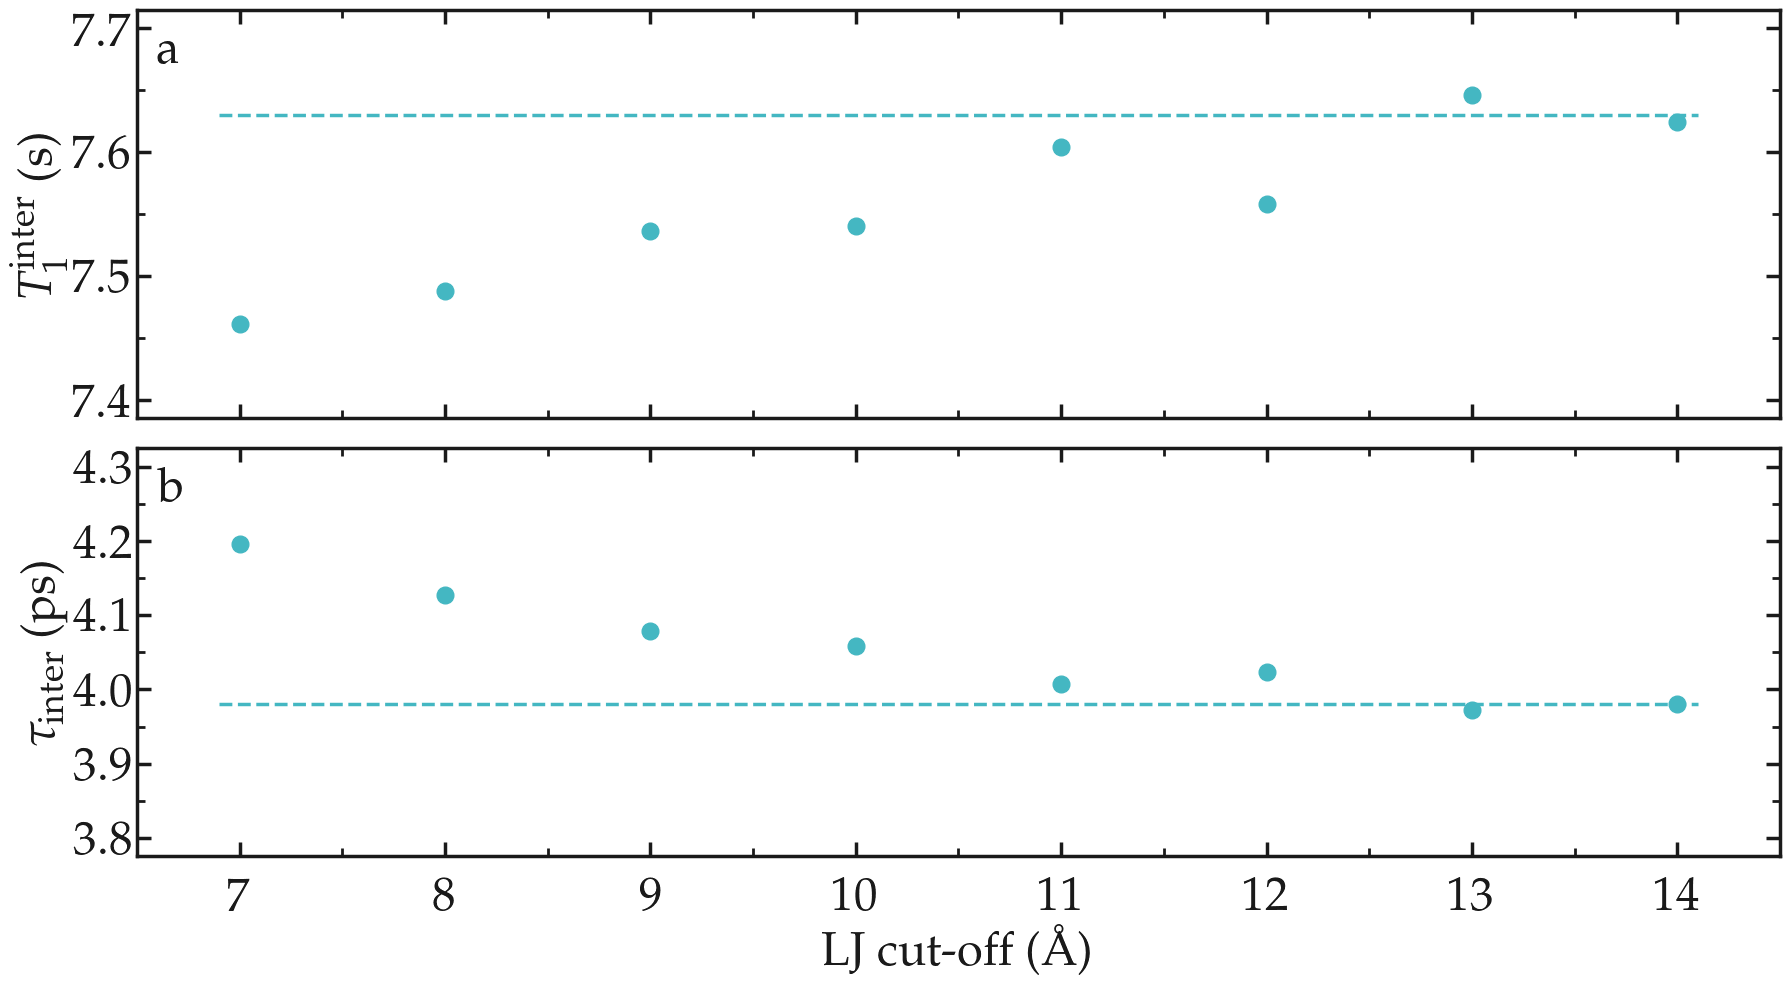

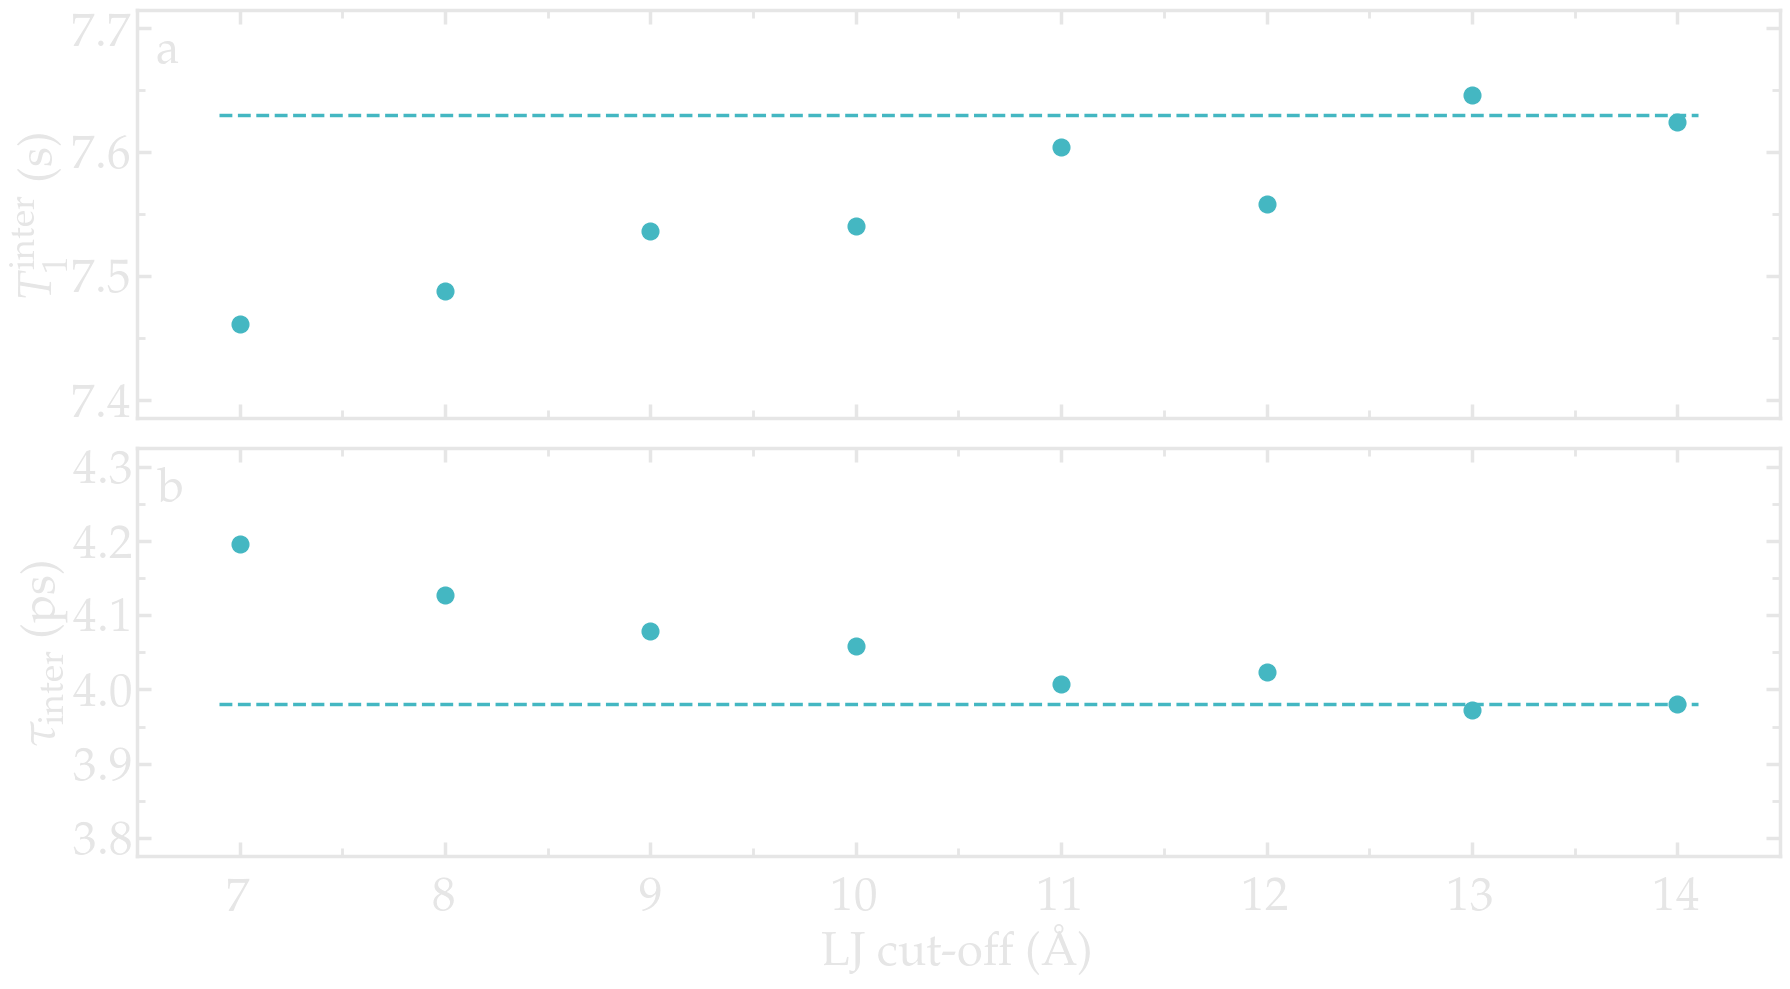

In [14]:
filename = "effect_cutoff"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,10))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(all_co, 1/R10_inter_vs_co, "o", color=colors["mycyan"],
                markersize = 12, linewidth=4) #, label=r'TIP4P$-\epsilon$')
    x = np.linspace(6.9, 14.1)
    ax[-1].plot(x, x*0+7.63, "--", color=colors["mycyan"],
                markersize = 12, linewidth=2.5)
    complete_panel(ax[-1], None, r'$T_1^\mathrm{inter}$ (s)',
                   legend=False, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(6.5, 14.5), y_boundaries=(7.385, 7.715),
                   y_ticks=np.arange(7.4, 7.71, 0.1))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(all_co, tau_inter_vs_co, "o", color=colors["mycyan"],
                markersize = 12, linewidth=4) #, label=r'TIP4P$-\epsilon$')
    x = np.linspace(6.9, 14.1)
    ax[-1].plot(x, x*0+3.98, "--", color=colors["mycyan"],
                markersize = 12, linewidth=2.5)
    complete_panel(ax[-1], r'LJ cut-off ($\textrm{\AA}$)', r'$\tau_\mathrm{inter}$ (ps)',
                   legend=False, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(6.5, 14.5), y_boundaries=(3.775, 4.325),
                   y_ticks=np.arange(3.8, 4.31, 0.1))
    add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename)

# Varying dumping frequency

In [15]:
all_dump = []
R1_intra_vs_dump = []
R2_intra_vs_dump = []
gij_intra_vs_dump = []
tau_intra_vs_dump = []
f_vs_dump = []
t_vs_dump = []
R1_inter_vs_dump = []
R2_inter_vs_dump = []
gij_inter_vs_dump = []
tau_inter_vs_dump = []
for dt in ["0.02", "0.04", "0.08", "0.16", "0.32", "0.64", "1.28", "2.56", "5.12"]:
    t, f, gij, R1, R2 = read_dic("bulk-water-tip4p-vs-dumping/raw_data/N4000_intra_dt"+dt+"ps.npy")
    t_vs_T, f_vs_dump, gij_intra_vs_dump, R1_intra_vs_dump, R2_intra_vs_dump \
        = append_data(t, f, gij, R1, R2, t_vs_dump, f_vs_dump, gij_intra_vs_dump, R1_intra_vs_dump, R2_intra_vs_dump)
    tau_intra_vs_dump.append(np.trapz(gij_intra_vs_dump[-1], t) / gij_intra_vs_dump[-1][0])
    t, f, gij, R1, R2 = read_dic("bulk-water-tip4p-vs-dumping/raw_data/N4000_inter_dt"+dt+"ps.npy")
    t_vs_dump, f_vs_dump, gij_inter_vs_dump, R1_inter_vs_dump, R2_inter_vs_dump \
        = append_data(t, f, gij, R1, R2, [], [], gij_inter_vs_dump, R1_inter_vs_dump, R2_inter_vs_dump) 
    tau_inter_vs_dump.append(np.trapz(gij_inter_vs_dump[-1], t) / gij_inter_vs_dump[-1][0])
    all_dump.append(np.float32(dt))
all_dump = np.array(all_dump)
R10_inter_vs_dump = extract_R0(R1_inter_vs_dump)
R20_inter_vs_dump = extract_R0(R2_inter_vs_dump)
R10_intra_vs_dump = extract_R0(R1_intra_vs_dump)
R20_intra_vs_dump = extract_R0(R2_intra_vs_dump)
tau_intra_vs_dump = np.array(tau_intra_vs_dump)
tau_inter_vs_dump = np.array(tau_inter_vs_dump)

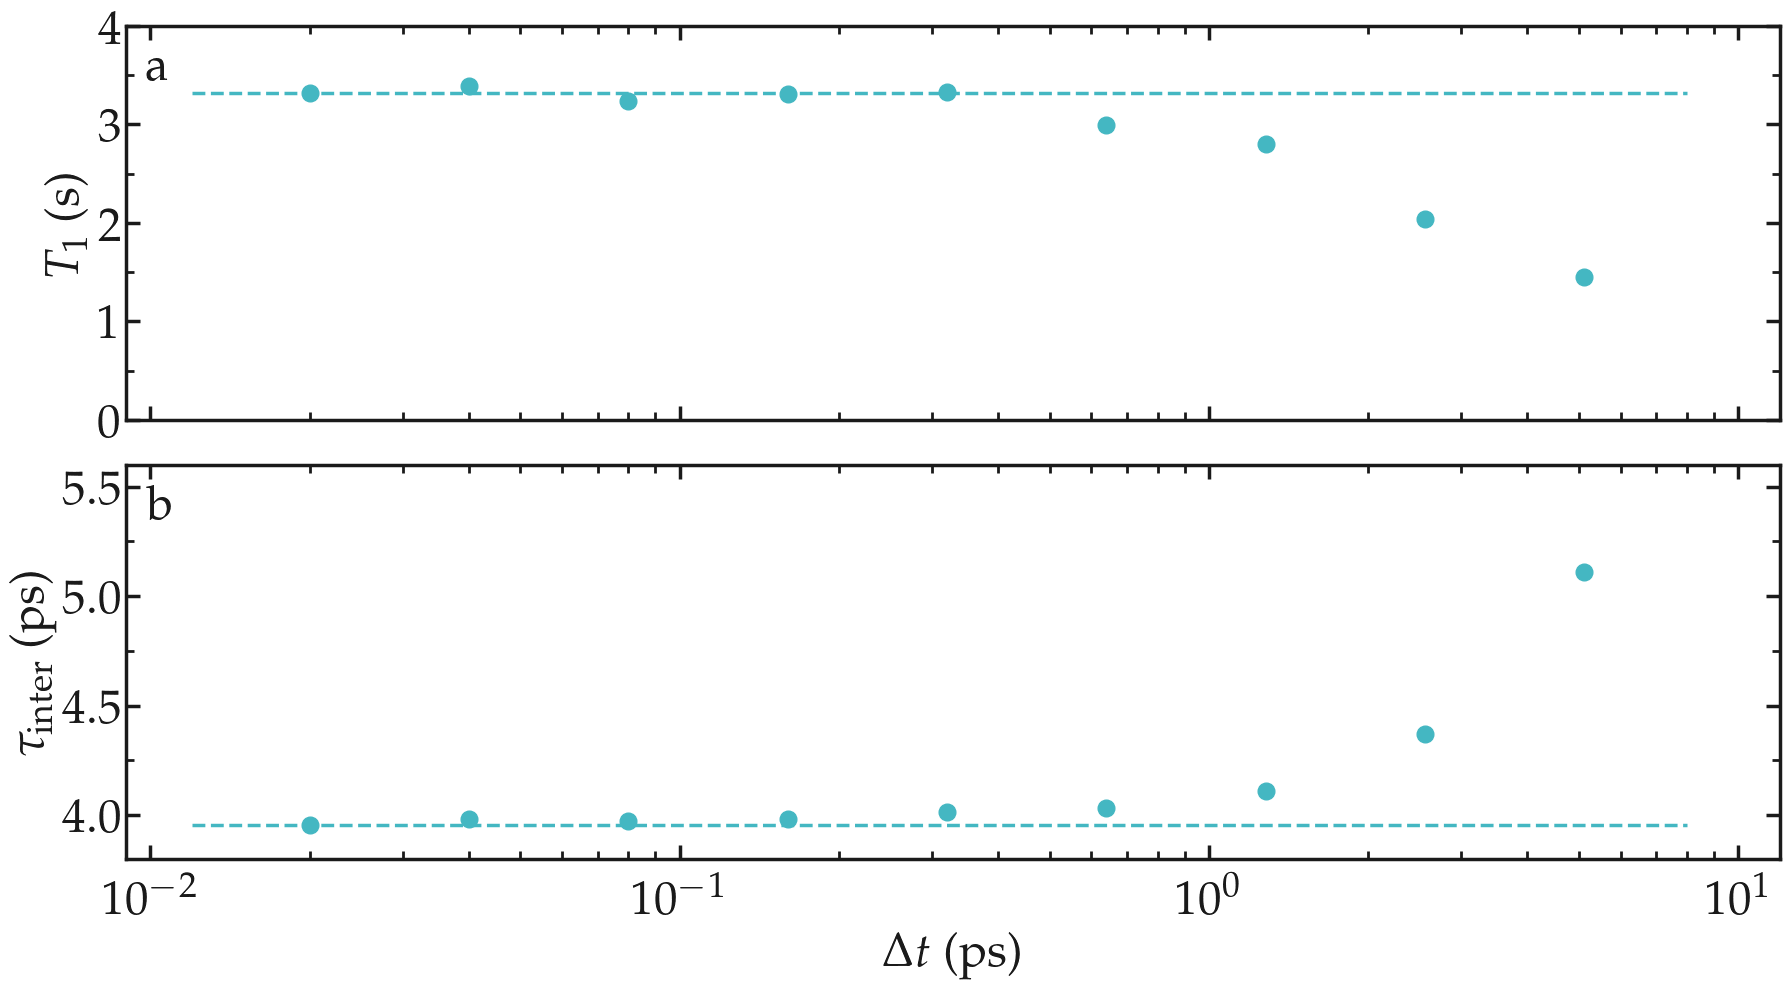

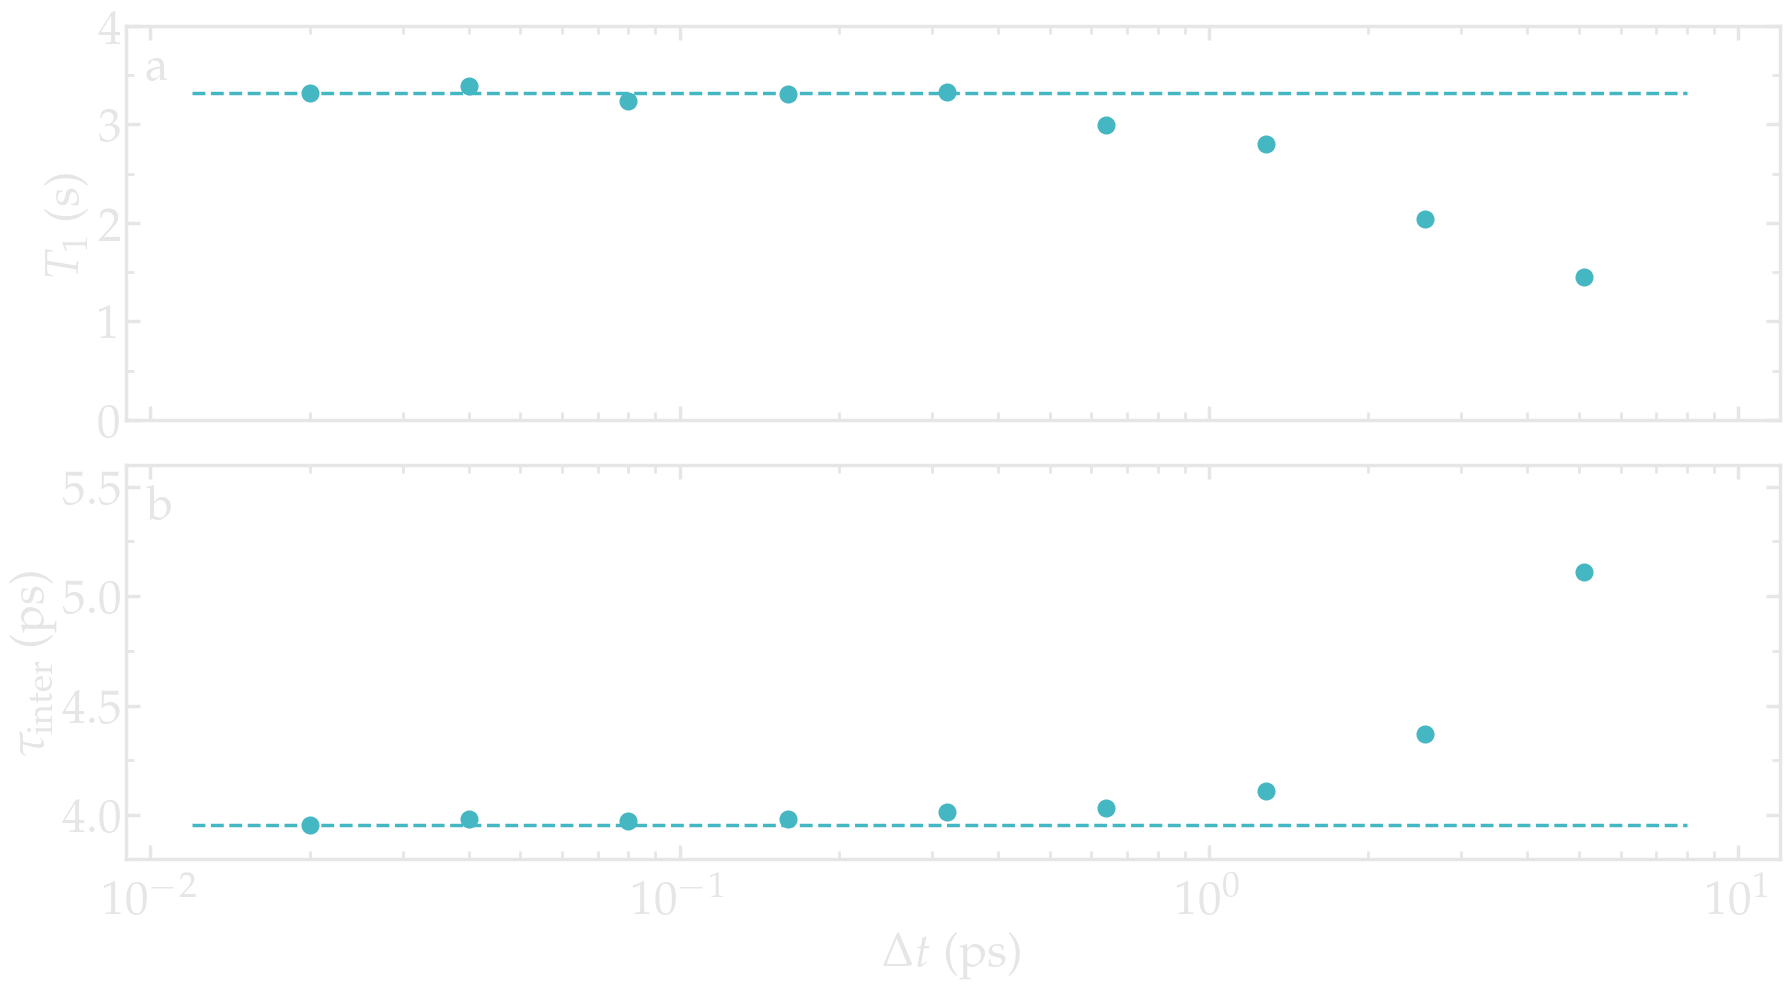

In [16]:
filename = "effect_dumping_frequency"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,10))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].semilogx(all_dump, 1/(R10_intra_vs_dump+R10_inter_vs_dump), "o", color=colors["mycyan"],
                markersize = 12, linewidth=4)
    x = np.linspace(0.012, 8)
    ax[-1].semilogx(x, x*0+1/(R10_intra_vs_dump[0]+R10_inter_vs_dump[0]), "--", color=colors["mycyan"],
                markersize = 12, linewidth=2.5)
    complete_panel(ax[-1], None, r'$T_1$ (s)', locator_x=None,
                   legend=False, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(0.009, 12), y_boundaries=(0, 4),
                   y_ticks=np.arange(0, 4.1, 1.0))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].semilogx(all_dump, tau_inter_vs_dump, "o", color=colors["mycyan"],
                markersize = 12, linewidth=4) #, label=r'TIP4P$-\epsilon$')
    x = np.linspace(0.012, 8)
    ax[-1].semilogx(x, x*0+tau_inter_vs_dump[0], "--", color=colors["mycyan"],
                markersize = 12, linewidth=2.5)
    complete_panel(ax[-1], r'$\Delta t$ (ps)', r'$\tau_\mathrm{inter}$ (ps)',
                   legend=False, axis_color=mygray, xpad=15, locator_x=None)
    set_boundaries(plt, x_boundaries=(0.009, 12), y_boundaries=(3.8, 5.6),
                   y_ticks=np.arange(4.0, 5.51, 0.5))
    add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename)

# Varying box size

In [17]:
all_N = []
R1_intra_vs_N = []
R2_intra_vs_N = []
gij_intra_vs_N = []
f_vs_N = []
t_vs_N = []
R1_inter_vs_N = []
R2_inter_vs_N = []
gij_inter_vs_N = []
for N in ["N25", "N39", "N62", "N99", "N158", "N251", "N398", "N631", "N1002", "N1589", "N2521", "N4000", "N6500", "N10000"]:
    for n in range(20):
        if os.path.exists("bulk-water-tip4p-vs-size/raw_data/"+N+"_intra_n"+str(n)+".npy"):
            t, f, gij, R1, R2 = read_dic("bulk-water-tip4p-vs-size/raw_data/"+N+"_intra_n"+str(n)+".npy")
            t_vs_N, f_vs_N, gij_intra_vs_N, R1_intra_vs_N, R2_intra_vs_N = append_data(t, f, gij, R1, R2, t_vs_N, f_vs_N, gij_intra_vs_N, R1_intra_vs_N, R2_intra_vs_N)
            t, f, gij, R1, R2 = read_dic("bulk-water-tip4p-vs-size/raw_data/"+N+"_inter_n"+str(n)+".npy")
            _, _, gij_inter_vs_N, R1_inter_vs_N, R2_inter_vs_N = append_data(t, f, gij, R1, R2, [], [], gij_inter_vs_N, R1_inter_vs_N, R2_inter_vs_N)
            all_N.append(np.int32(N[1:]))
            if N == "N10000":
                t_N10000 = t
                gij_N10000 = gij
                f_N10000 = f 
                R1_N10000 = R1 
            elif N == "N158":
                t_N158 = t
                gij_N158 = gij
                f_N158 = f 
                R1_N158 = R1 
    if N == "N4000":
        t, f, gij, R1, R2 = read_dic("bulk-water-tip4p-vs-temperature/raw_data/N4000_intra_T300K.npy")
        t_vs_N, f_vs_N, gij_intra_vs_N, R1_intra_vs_N, R2_intra_vs_N = append_data(t, f, gij, R1, R2, t_vs_N, f_vs_N, gij_intra_vs_N, R1_intra_vs_N, R2_intra_vs_N)
        t, f, gij, R1, R2 = read_dic("bulk-water-tip4p-vs-temperature/raw_data/N4000_inter_T300K.npy")
        t_vs_N, f_vs_N, gij_inter_vs_N, R1_inter_vs_N, R2_inter_vs_N = append_data(t, f, gij, R1, R2, [], [], gij_inter_vs_N, R1_inter_vs_N, R2_inter_vs_N)
        all_N.append(np.int32(N[1:]))
all_N = np.array(all_N)
R10_inter_vs_N = extract_R0(R1_inter_vs_N)
R20_inter_vs_N = extract_R0(R2_inter_vs_N)
R10_intra_vs_N = extract_R0(R1_intra_vs_N)
R20_intra_vs_N = extract_R0(R2_intra_vs_N)

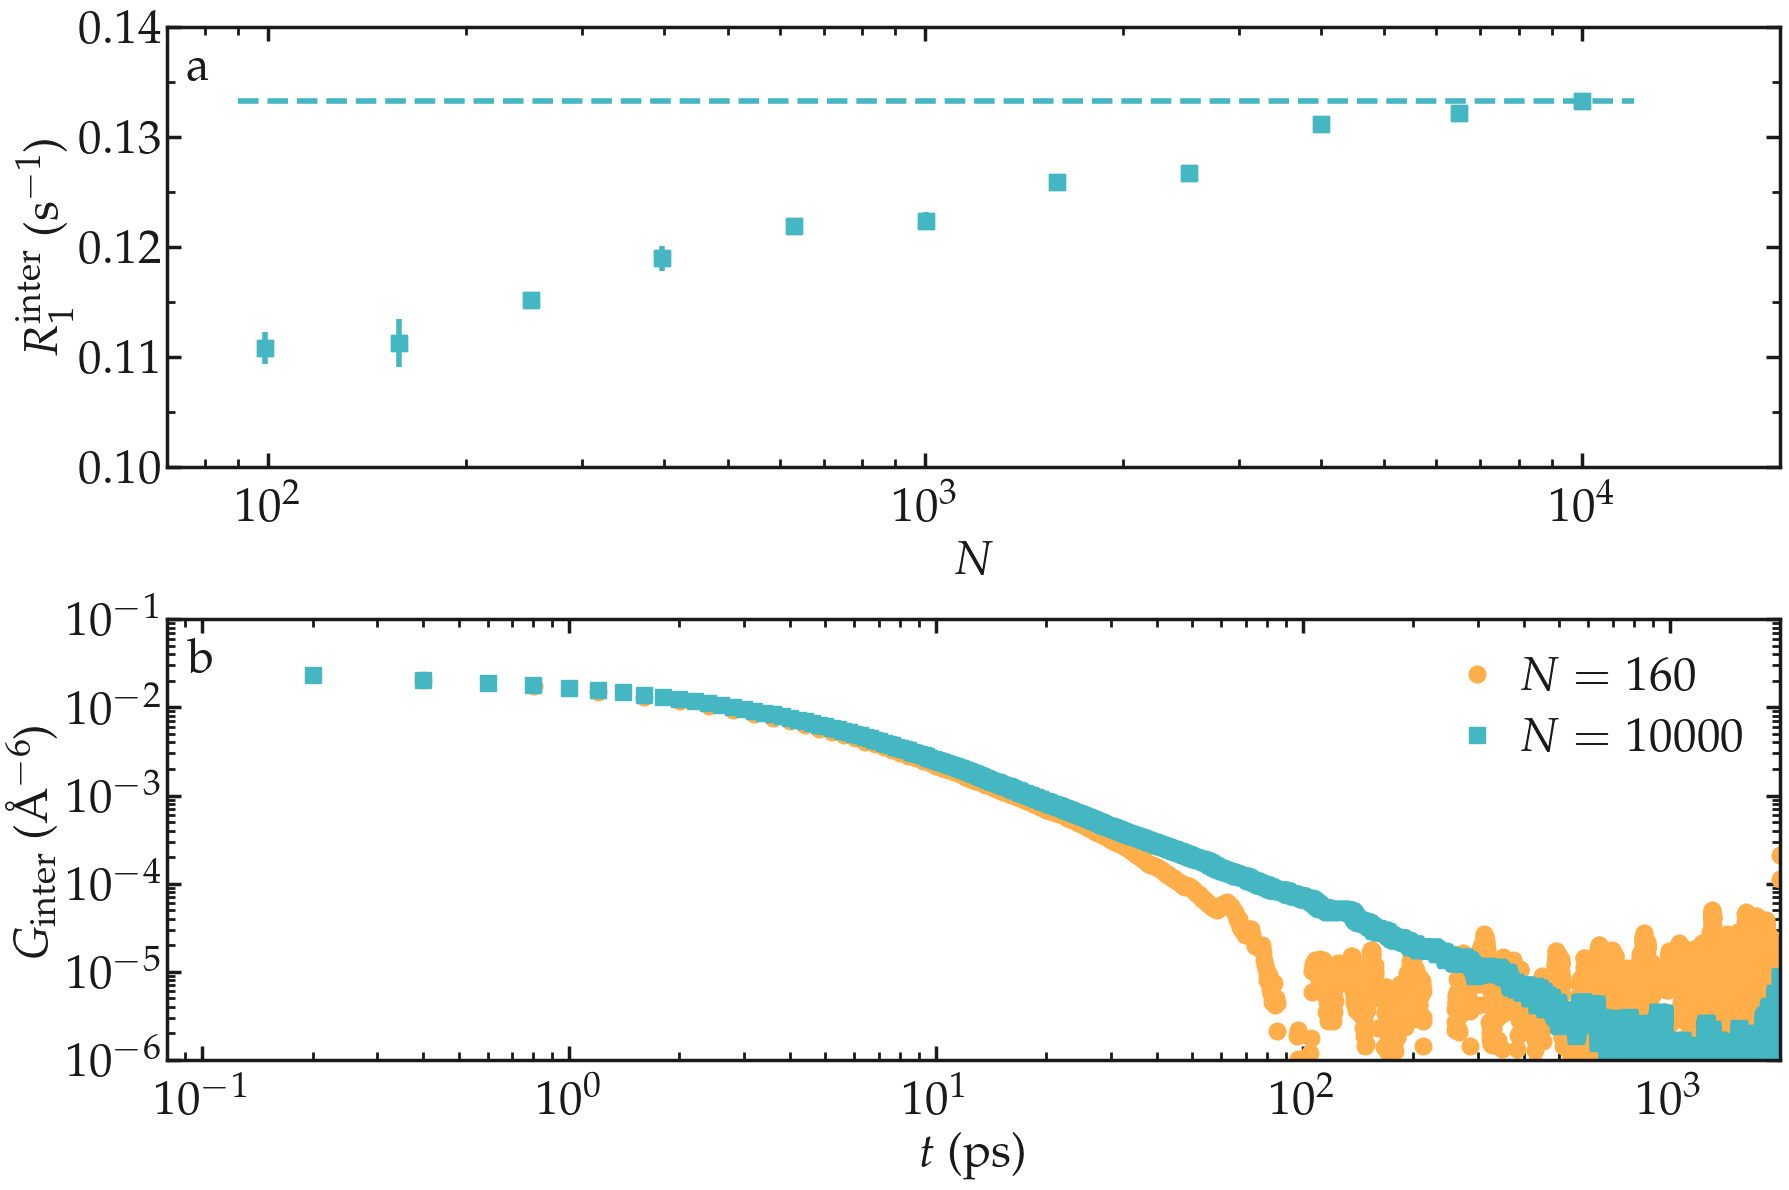

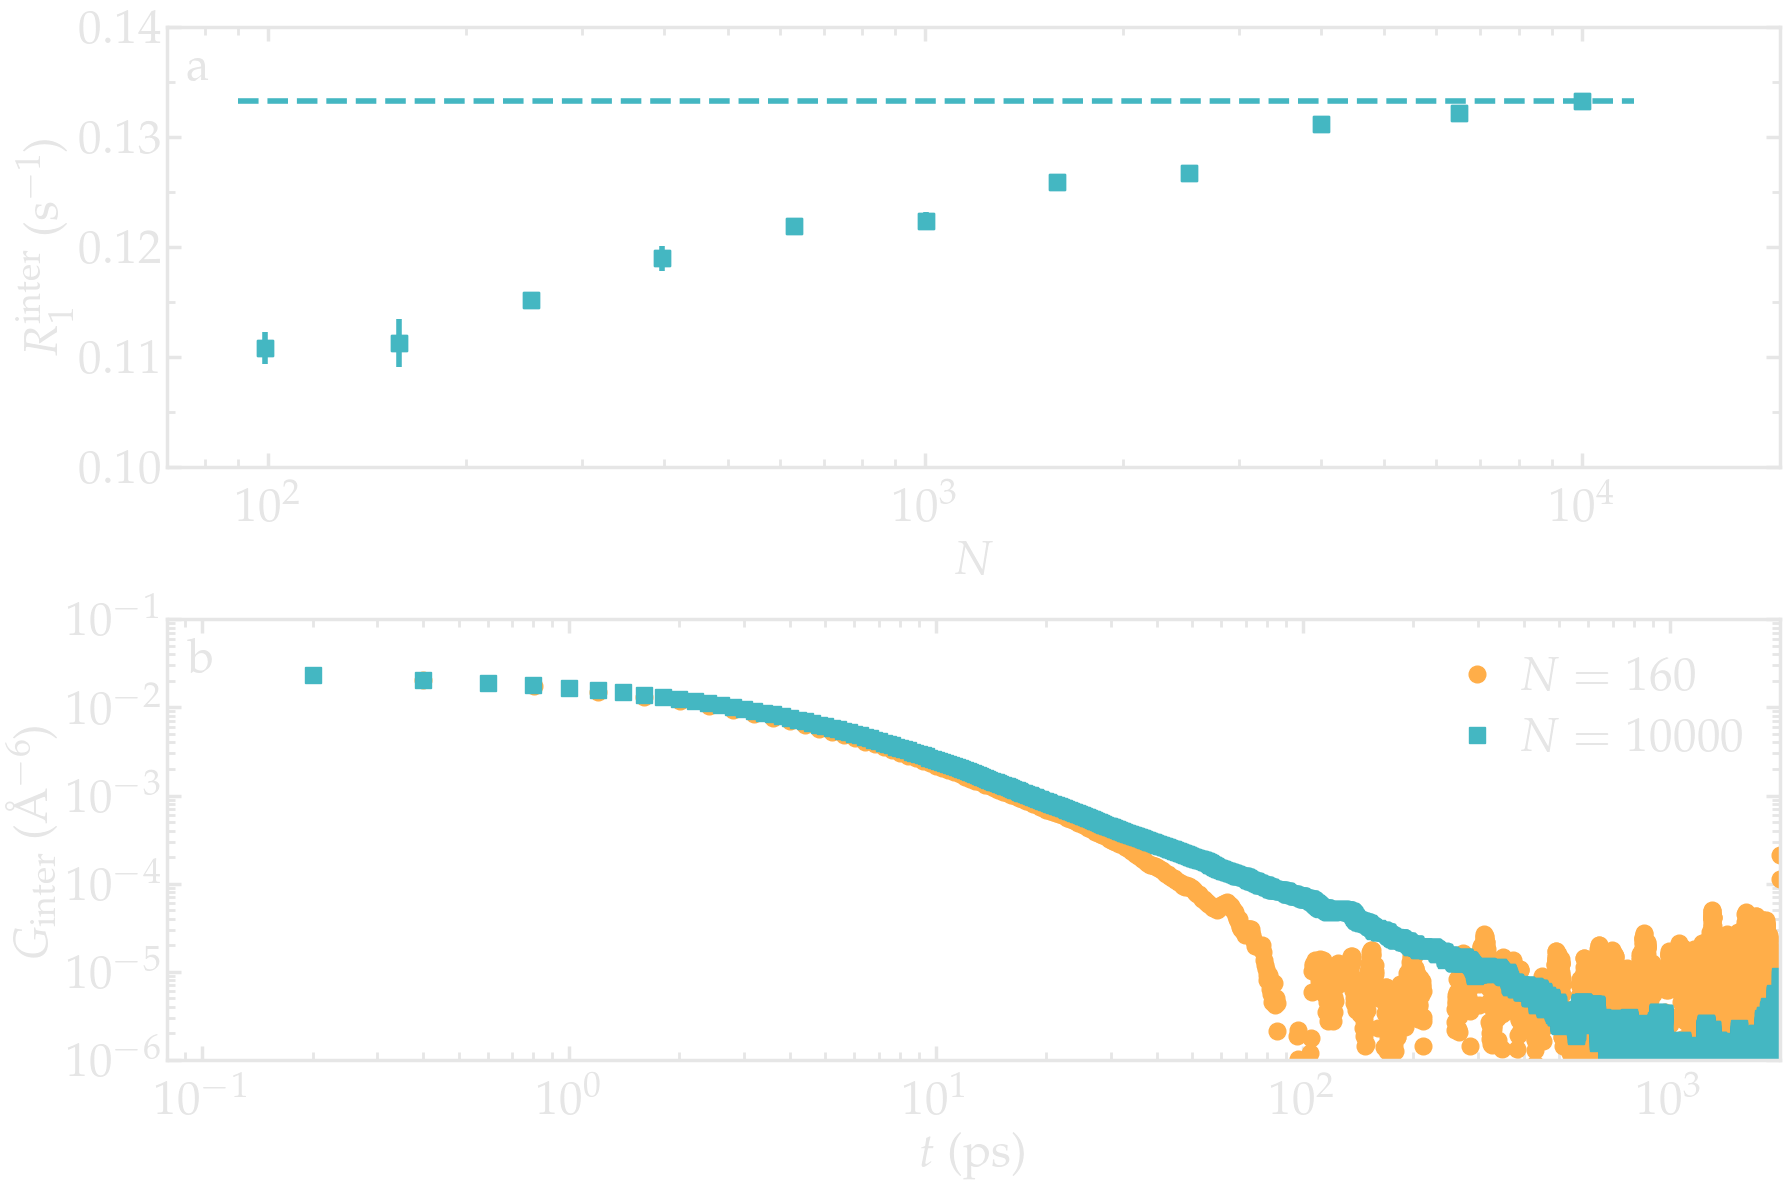

In [20]:
unique_N = []
unique_mR1inter = []
unique_sR1inter = []
for N in np.unique(all_N):
    unique_N.append(N)
    sub_R1 = R10_inter_vs_N[all_N == N]
    unique_mR1inter.append(np.mean(sub_R1))
    unique_sR1inter.append(np.std(sub_R1) / np.sqrt(len(sub_R1)))
unique_N = np.array(unique_N)
unique_mR1inter = np.array(unique_mR1inter)
unique_sR1inter = np.array(unique_sR1inter)

unique_N = []
unique_mR1 = []
unique_sR1 = []
for N in np.unique(all_N):
    unique_N.append(N)
    sub_R1 = R10_inter_vs_N[all_N == N] + R10_intra_vs_N[all_N == N]
    unique_mR1.append(np.mean(sub_R1))
    unique_sR1.append(np.std(sub_R1) / np.sqrt(len(sub_R1)))
unique_N = np.array(unique_N)
unique_mR1 = np.array(unique_mR1)
unique_sR1 = np.array(unique_sR1)

filename = "effect_L_on_R1"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,12))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].errorbar(unique_N, unique_mR1inter, unique_sR1inter, unique_sR1*0, "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$R_1^\mathrm{inter}$')
    ax[-1].semilogx(unique_N, unique_mR1inter, "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$R_1^\mathrm{inter}$')
    x = np.linspace(90, 12000)
    ax[-1].semilogx(x, x*0 + R10_inter_vs_N[-1],
                    "--", color=colors["mycyan"],
                    markersize = 12, linewidth=4)
    complete_panel(ax[-1], r'$N$', r'$R_1^\mathrm{inter}$ (s$^{-1}$)',
                   legend=False, axis_color=mygray, xpad=15,  locator_x = None)
    set_boundaries(plt, x_boundaries=(70, 20000), y_boundaries=(0.1, 0.14), y_ticks=np.arange(0.1, 0.142, 0.01))
    #n += 1
    #ax.append(plt.subplot(l_tot, c_tot, n))
    #ax[-1].errorbar(unique_N, unique_mR1, unique_sR1, unique_sR1*0, "s", color=colors["mycyan"],
    #                markersize = 12, linewidth=4, label=r'$R_1^\mathrm{inter}$')
    #ax[-1].semilogx(unique_N, unique_mR1, "s", color=colors["mycyan"],
    #                markersize = 12, linewidth=4, label=r'$R_1^\mathrm{inter}$')
    #x = np.linspace(90, 12000)
    #ax[-1].semilogx(x, x*0 + R10_inter_vs_N[-1] + R10_intra_vs_N[-1],
    #                "--", color=colors["mycyan"],
    #                markersize = 12, linewidth=4)
    #complete_panel(ax[-1], r'$N$', r'$R_1^\mathrm{inter}$ (s$^{-1}$)',
    #               legend=False, axis_color=mygray, xpad=15,  locator_x = None)
    #set_boundaries(plt, x_boundaries=(70, 20000), y_boundaries=(0.2, 0.4), y_ticks=np.arange(0.2, 0.42, 0.1))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].loglog(t_N158, gij_N158, "o", color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$N = 160$')
    ax[-1].loglog(t_N10000, gij_N10000, "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$N = 10000$')
    complete_panel(ax[-1], r'$t$ (ps)', r'$G_\mathrm{inter}$ (\AA$^{-6}$)',
                   legend=True, axis_color=mygray, xpad=15,  locator_x = None,  locator_y = None)
    set_boundaries(plt, x_boundaries=(0.08, 2000), y_boundaries=(1e-6, 0.1)) #, y_ticks=np.arange(0.1, 0.142, 0.01))
    # x_ticks=np.arange(-1, 0.2, 0.2)
    add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename)

# Aniso data

In [44]:
t_aniso, f_aniso, gij1_intra_aniso, gij2_intra_aniso, gij3_intra_aniso, R1_intra_aniso, R2_intra_aniso = read_dic("bulk-water-tip4p-anisotropic/raw_data/N4000_intra_T300K.npy", aniso=True)
_, _, gij1_inter_aniso, gij2_inter_aniso, gij3_inter_aniso, R1_inter_aniso, R2_inter_aniso = read_dic("bulk-water-tip4p-anisotropic/raw_data/N4000_inter_T300K.npy", aniso=True)

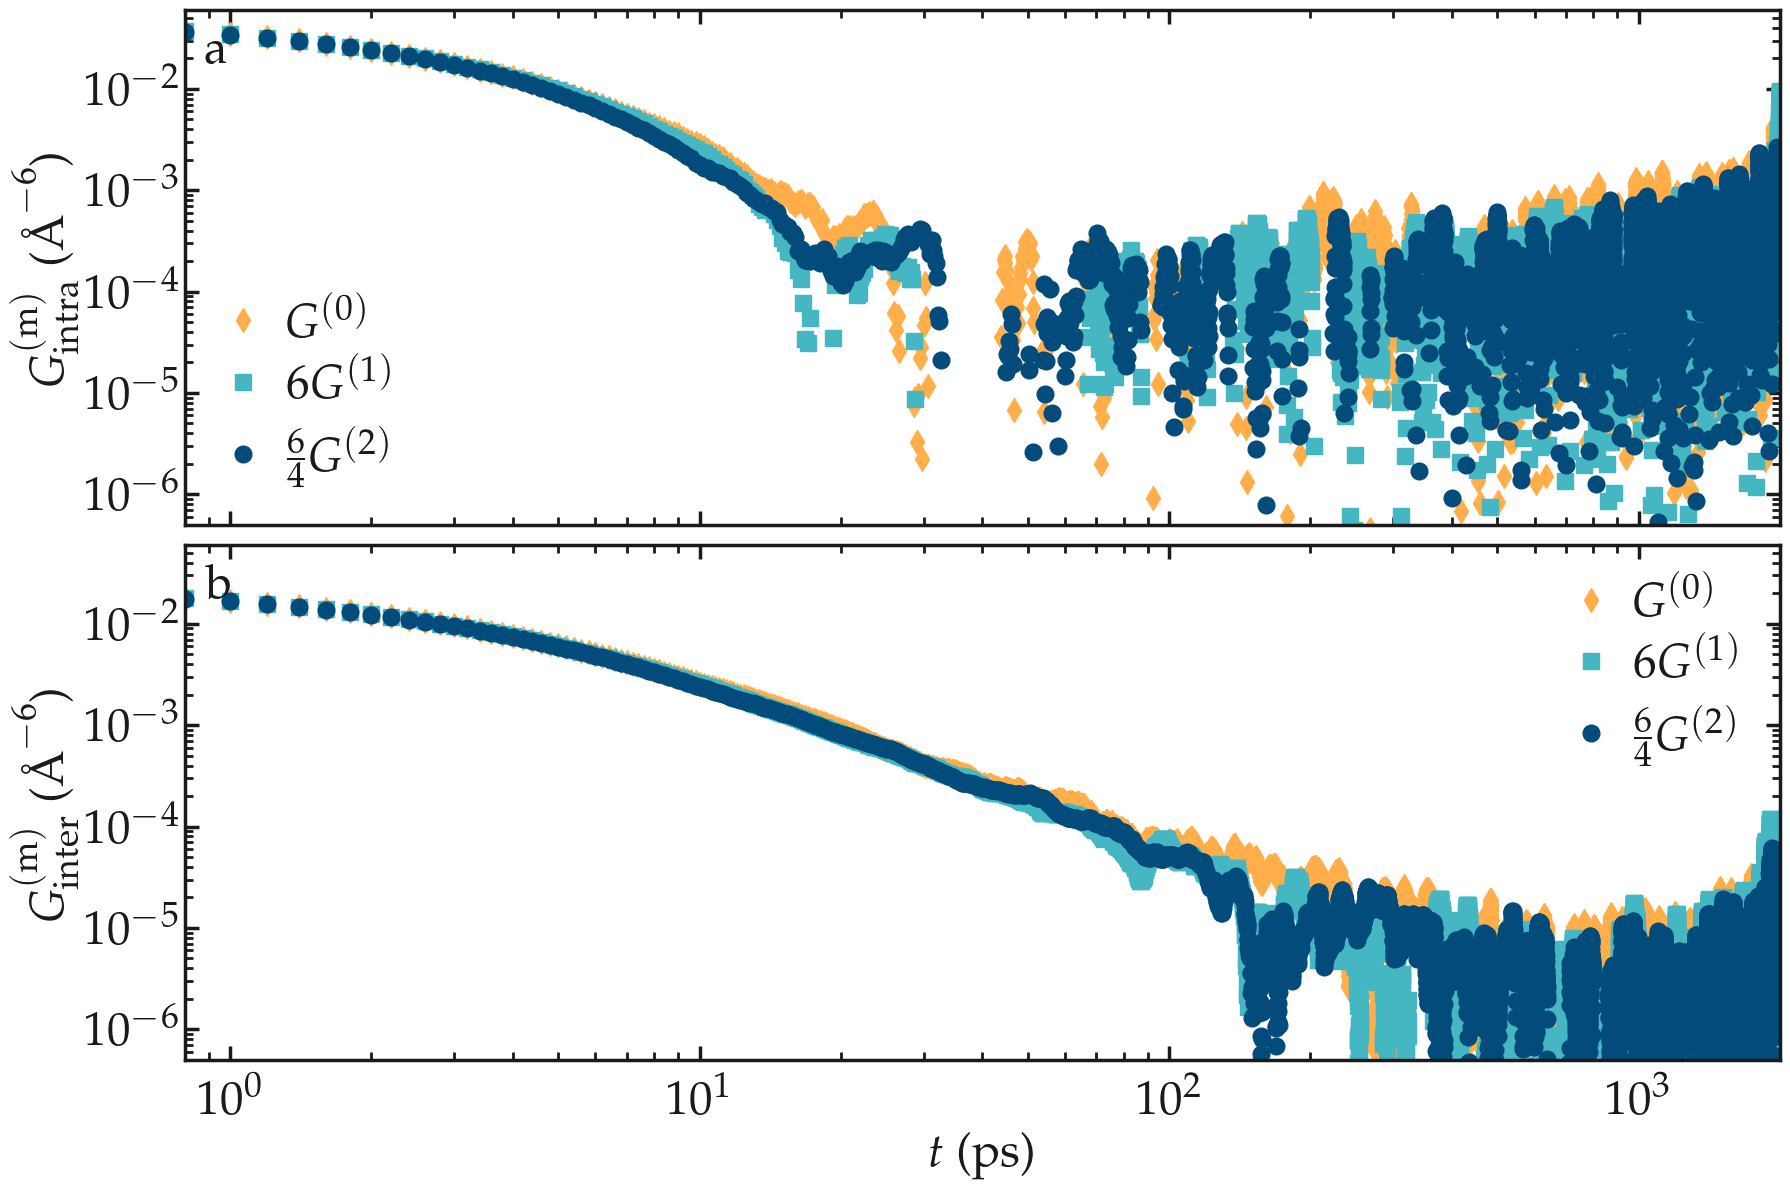

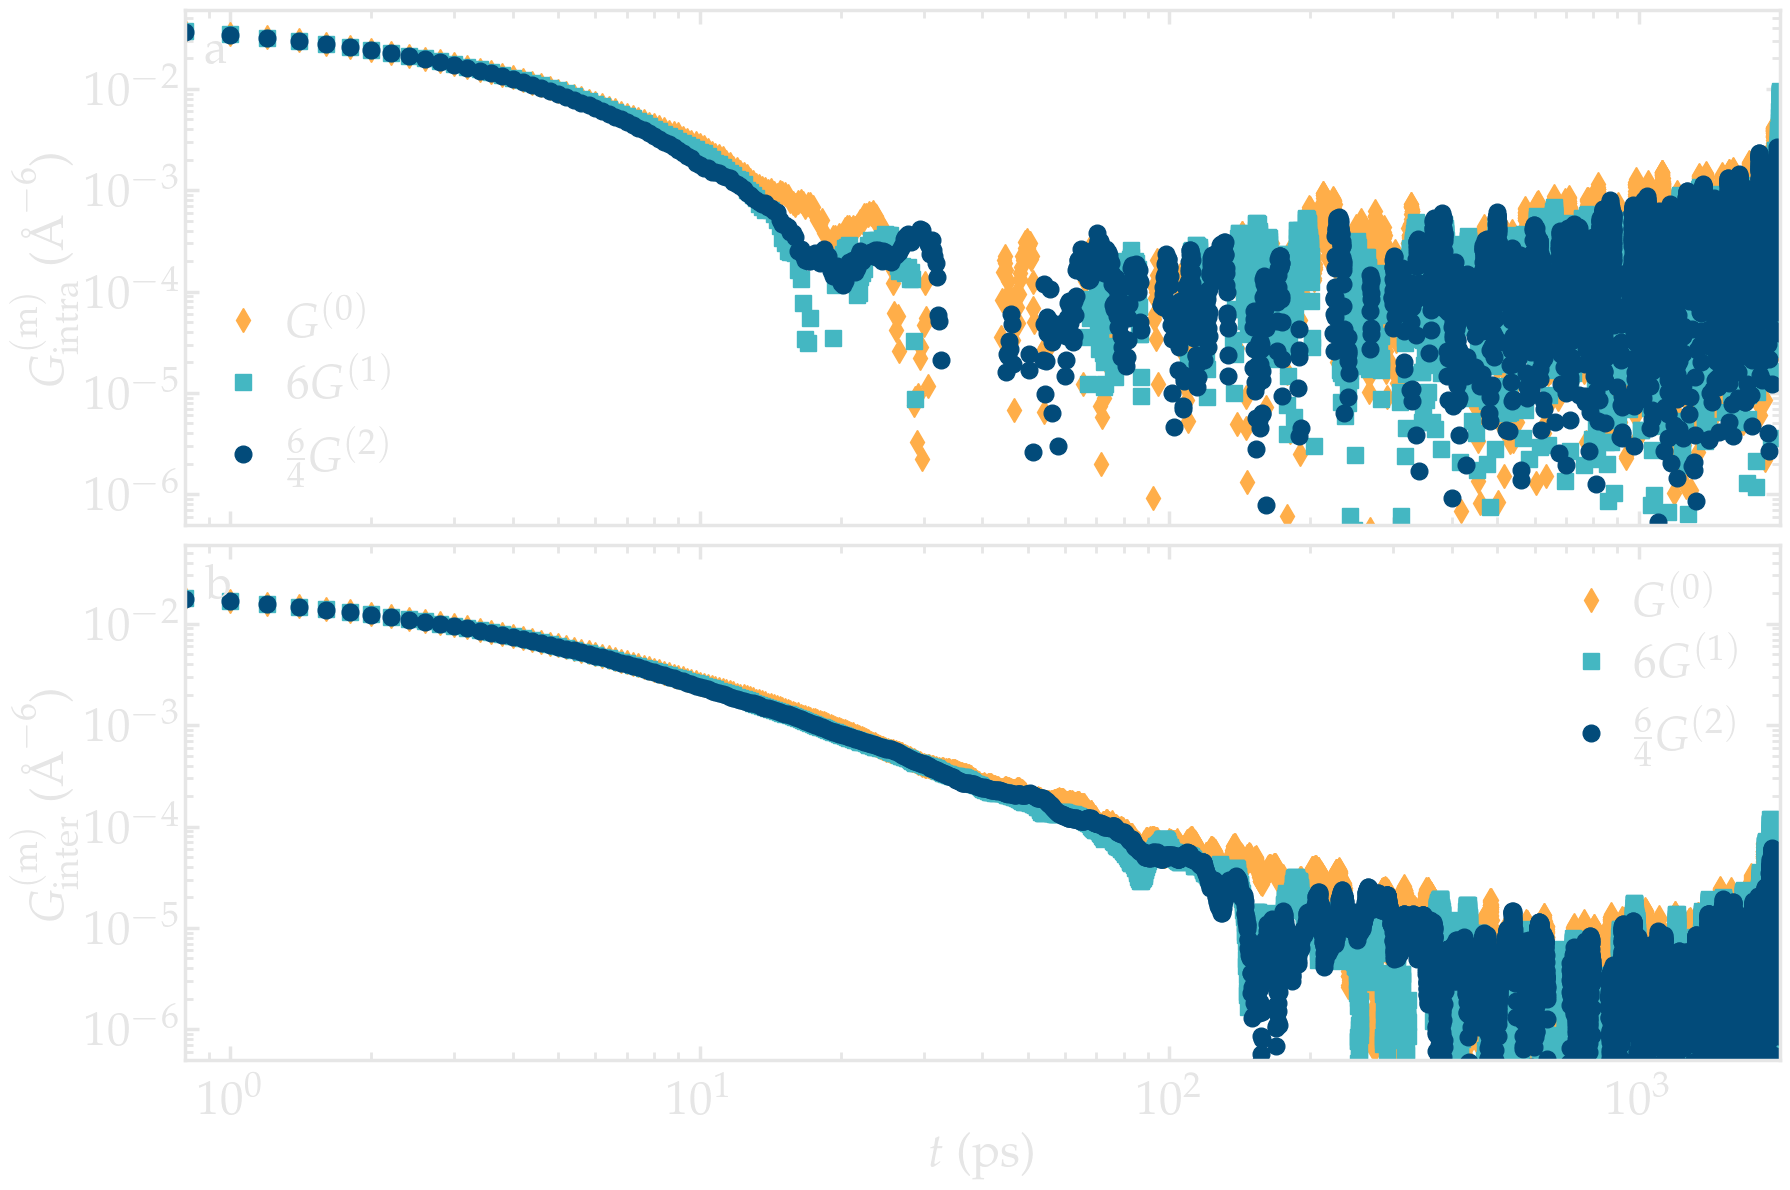

In [45]:
filename = "effect_of_anisotropy"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,12))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].loglog(t_aniso, gij1_intra_aniso, "d", color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$G^{(0)}$')
    ax[-1].loglog(t_aniso, gij2_intra_aniso*6, "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$6 G^{(1)}$')
    ax[-1].loglog(t_aniso, gij3_intra_aniso*6/4, "o", color=colors["mydarkblue"],
                    markersize = 12, linewidth=4, label=r'$\frac{6}{4} G^{(2)}$')
    complete_panel(ax[-1], None, r'$G_\mathrm{intra}^{(\mathrm{m})}$ ($\textrm{\AA}^{-6}$)',
                   legend=True, axis_color=mygray, xpad=15, locator_x = None, locator_y = None)
    set_boundaries(plt, x_boundaries=(0.8, 2000), y_boundaries=(5e-7, 0.06))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].loglog(t_aniso, gij1_inter_aniso, "d", color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$G^{(0)}$')
    ax[-1].loglog(t_aniso, gij2_inter_aniso*6, "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$6 G^{(1)}$')
    ax[-1].loglog(t_aniso, gij3_inter_aniso*6/4, "o", color=colors["mydarkblue"],
                    markersize = 12, linewidth=4, label=r'$\frac{6}{4} G^{(2)}$')
    complete_panel(ax[-1], r'$t$ (ps)', r'$G_\mathrm{inter}^{(\mathrm{m})}$ ($\textrm{\AA}^{-6}$)',
                   legend=True, axis_color=mygray, xpad=15, locator_x = None, locator_y = None)
    set_boundaries(plt, x_boundaries=(0.8, 2000), y_boundaries=(5e-7, 0.06))
    add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename)

In [35]:
help(complete_panel)

Help on function complete_panel in module functions:

complete_panel(ax, xlabel, ylabel, cancel_x=False, cancel_y=False, font={'family': 'sans', 'color': 'black', 'weight': 'normal', 'size': 34}, fontsize=34, linewidth=2.5, tickwidth1=2.5, tickwidth2=2, legend=True, ncol=1, locator_x=2, locator_y=2, title=None, axis_color=None, xpad=None, ypad=None)



/home/simon/Git/NMR/nmrformd/examples/shared/pyplot-perso/functions.py:133: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.tight_layout()
/home/simon/Git/NMR/nmrformd/examples/shared/pyplot-perso/functions.py:137: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(git_root + path_figures + filename + "-light.png",
/home/simon/Git/NMR/nmrformd/examples/shared/pyplot-perso/functions.py:142: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(git_root + path_figures + filename + "-dark.png",
/home/simon/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


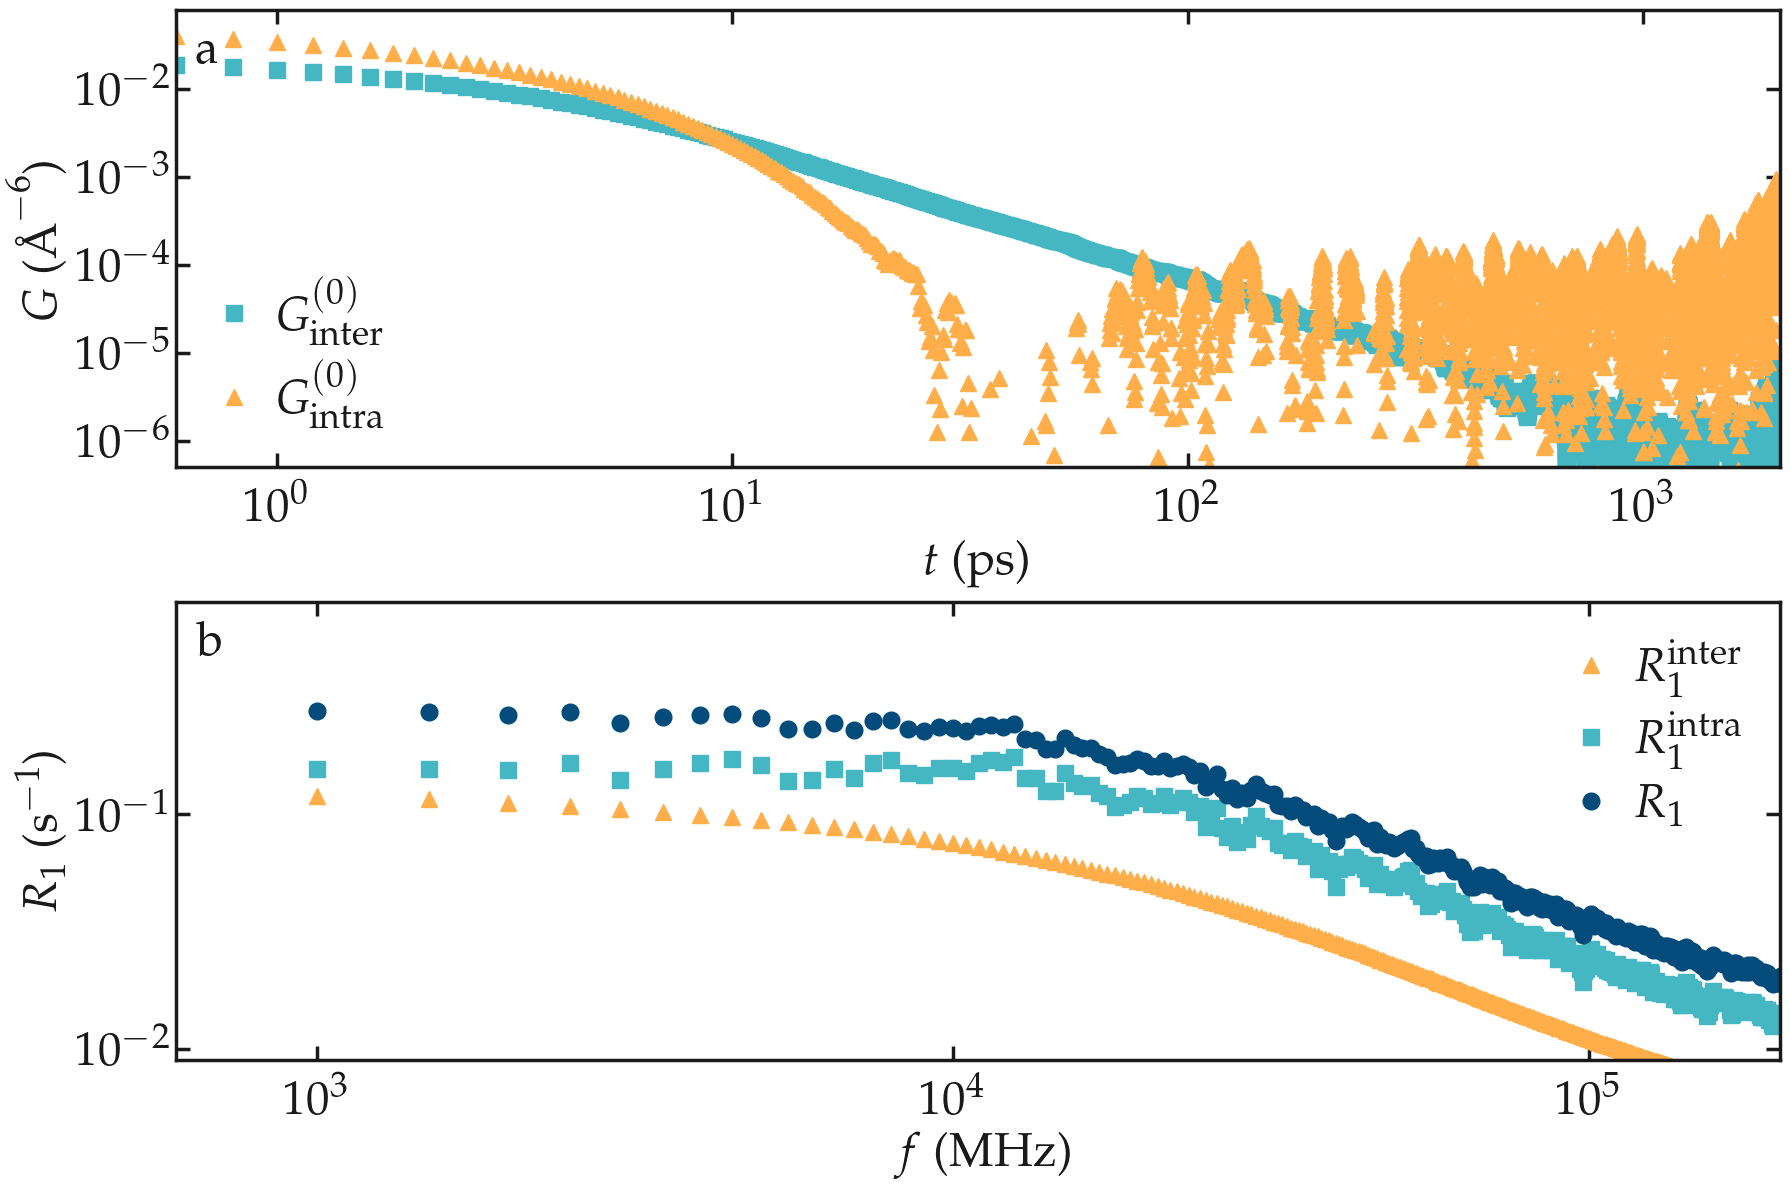

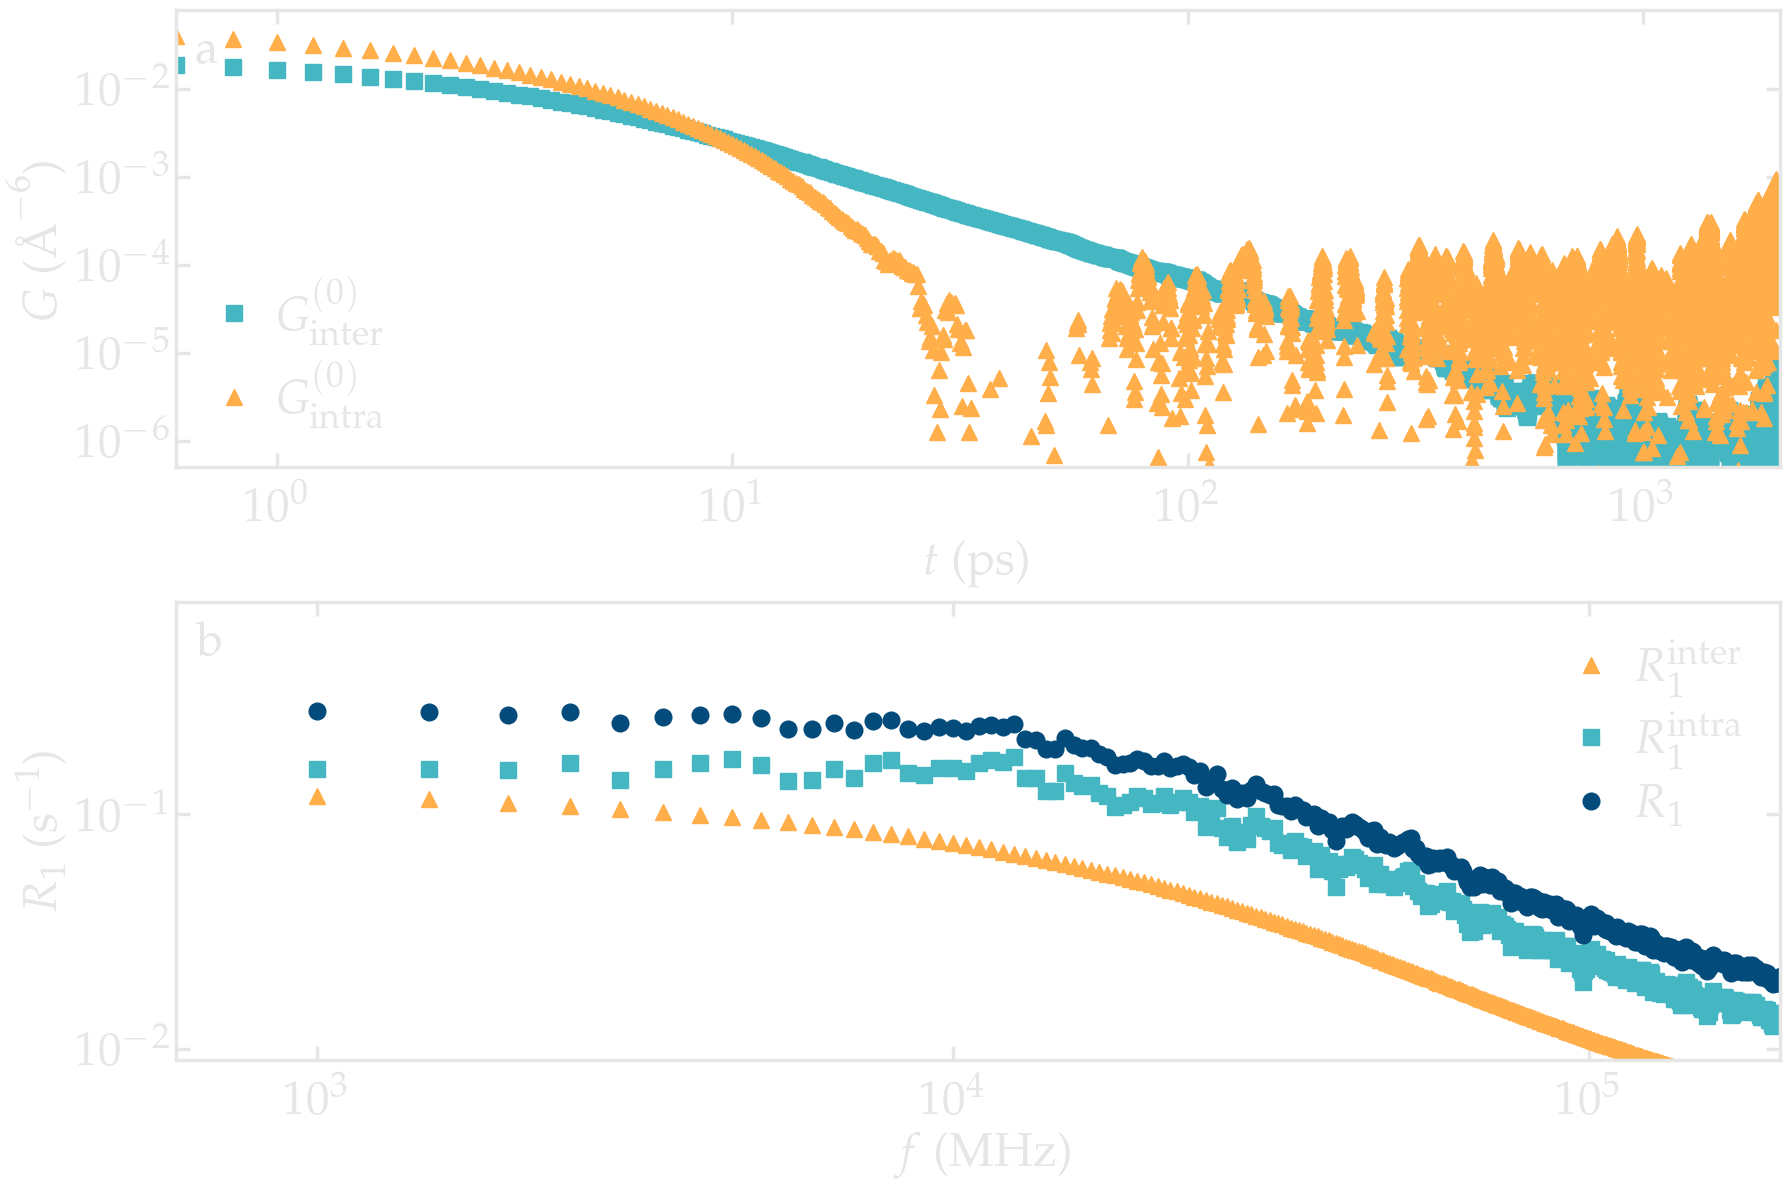

In [31]:
filename = "water_spectrum"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,12))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].loglog(t_vs_N[-1], gij_inter_vs_N[-1], "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$G_\mathrm{inter}^{(0)}$')
    ax[-1].loglog(t_vs_N[-1], gij_intra_vs_N[-1], "^", color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$G_\mathrm{intra}^{(0)}$')
    complete_panel(ax[-1], r'$t$ (ps)', r'$G$ ($\textrm{\AA}^{-6}$)',
                   legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(0.6, 2000), y_boundaries=(5e-7, 0.08))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].loglog(f_vs_N[-1], R1_inter_vs_N[-1], "^", color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$R_1^\mathrm{inter}$')
    ax[-1].loglog(f_vs_N[-1], R1_intra_vs_N[-1], "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$R_1^\mathrm{intra}$')
    ax[-1].loglog(f_vs_N[-1], R1_inter_vs_N[-1]+R1_intra_vs_N[-1], "o", color=colors["mydarkblue"],
                    markersize = 12, linewidth=4, label=r'$R_1$')
    complete_panel(ax[-1], r'$f$ (MHz)', r'$R_1$ (s$^{-1}$)',
                   legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(6e2, 2e5), y_boundaries=(0.009, 0.8), )
    # x_ticks=np.arange(-1, 0.2, 0.2)
    add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename)

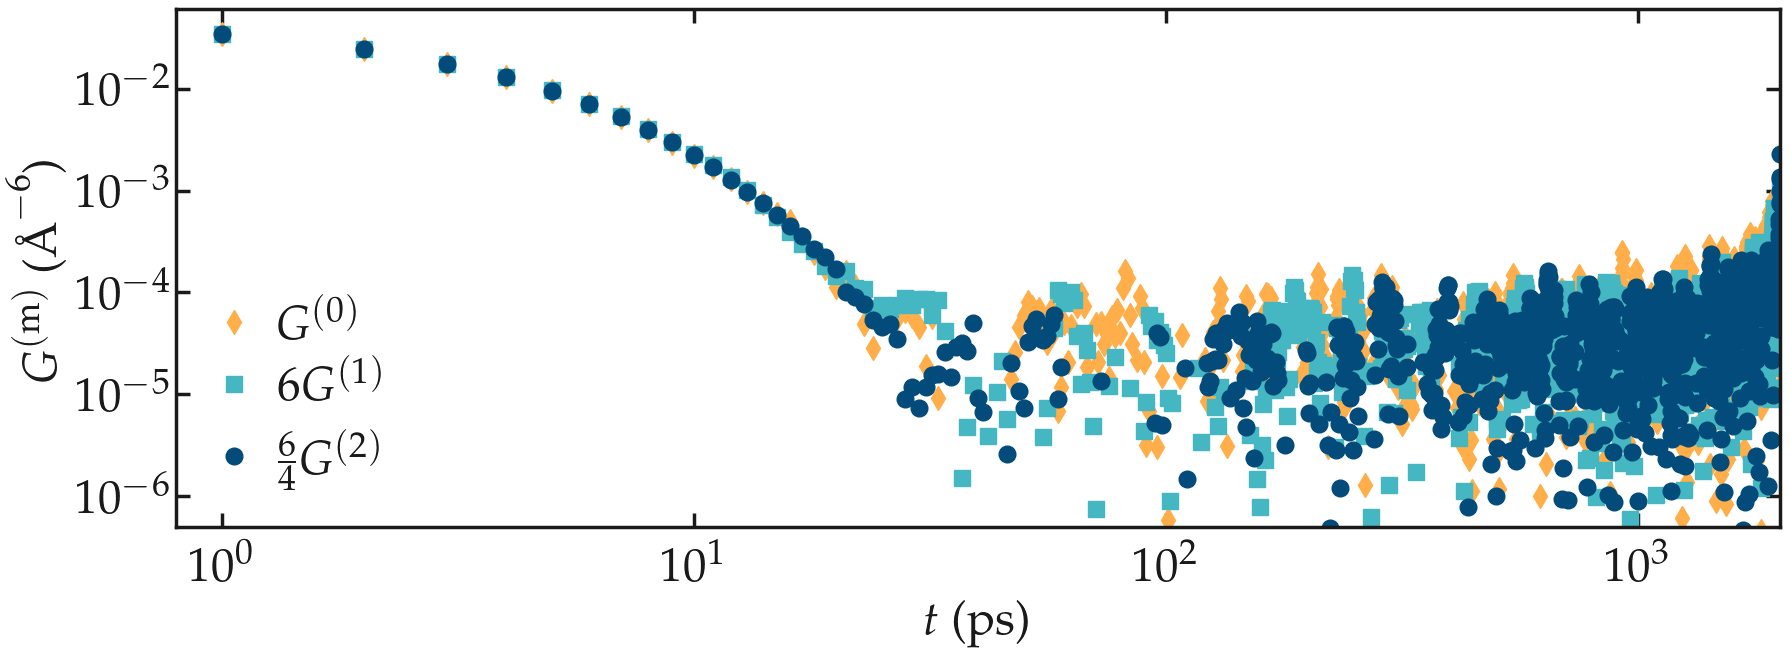

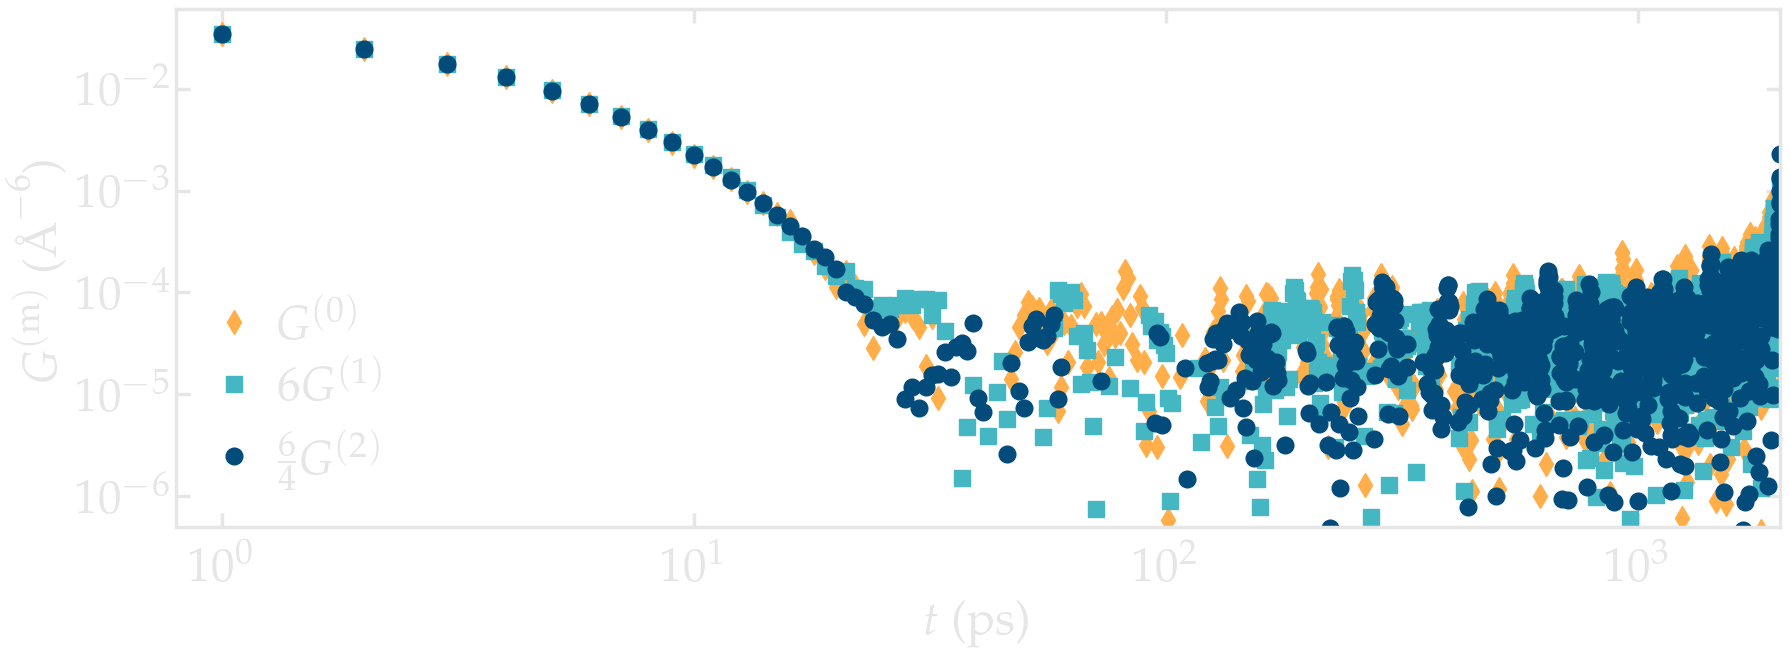

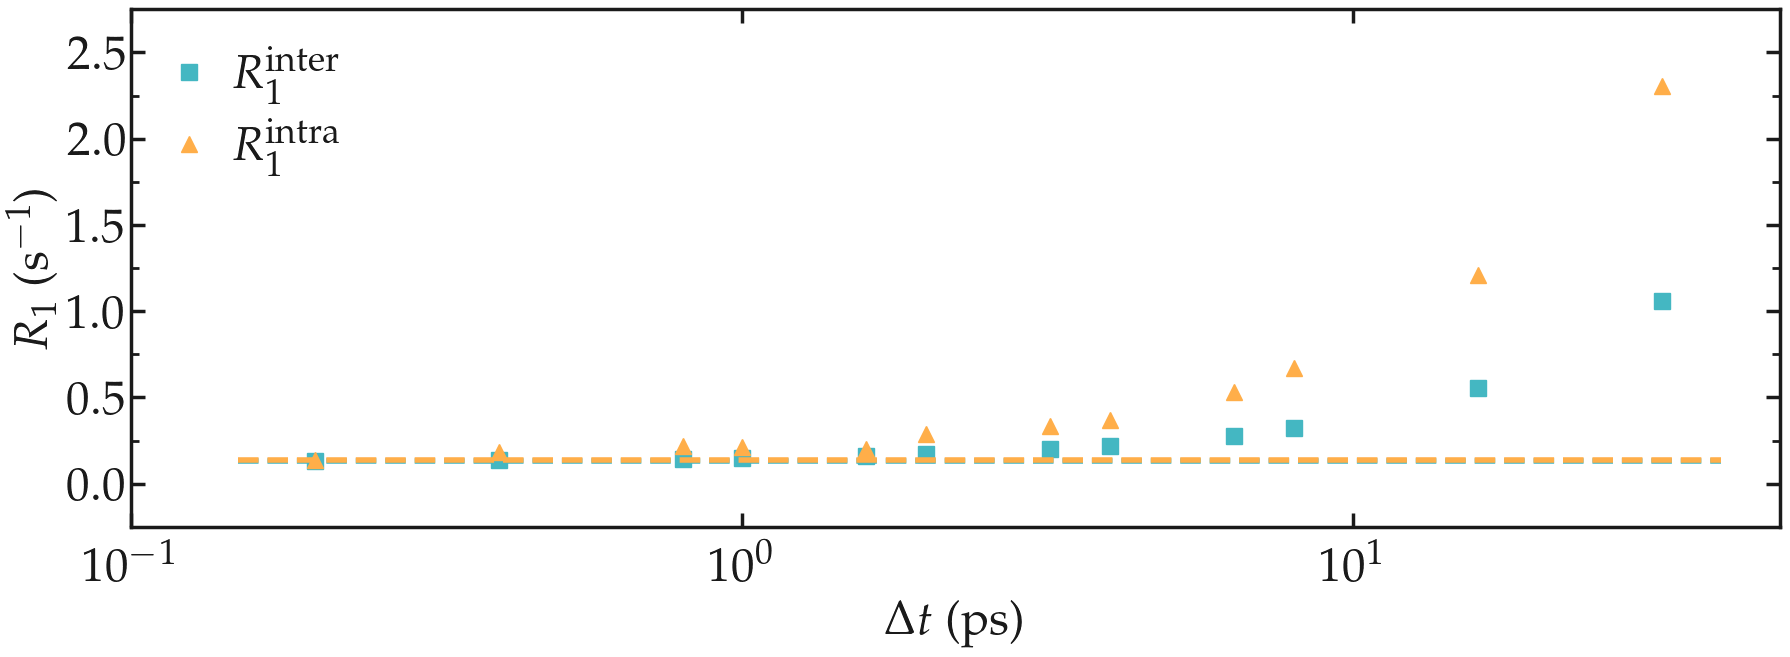

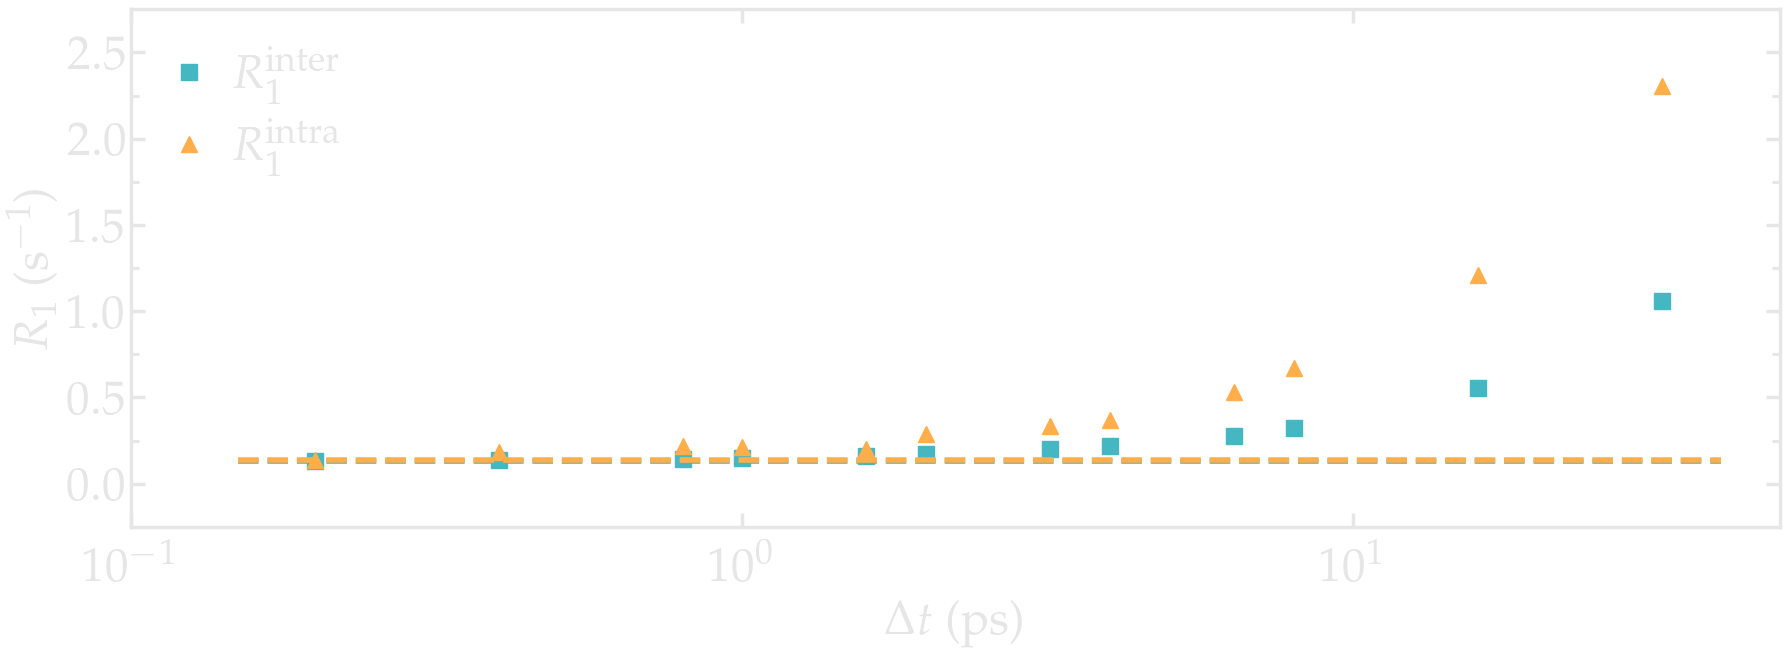

In [ ]:
filename = "effect_dt_on_R1"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,12))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    x = np.linspace(0.15, 40)
    ax[-1].semilogx(all_dt, R10_inter_vs_dt, "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$R_1^\mathrm{inter}$')
    ax[-1].semilogx(x, x*0 + R10_inter_vs_dt[0],
                    "--", color=colors["mycyan"],
                    markersize = 12, linewidth=4)
    ax[-1].semilogx(all_dt, R10_intra_vs_dt, "^", color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$R_1^\mathrm{intra}$')
    ax[-1].semilogx(x, x*0 + R10_intra_vs_dt[0],
                    "--", color=colors["myorange"],
                    markersize = 12, linewidth=4)
    complete_panel(ax[-1], r'$\Delta t$ (ps)', r'$R_1$ (s$^{-1}$)',
                   legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(0.1, 50), y_boundaries=(-0.25, 2.75))
    # x_ticks=np.arange(-1, 0.2, 0.2)
    # add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)

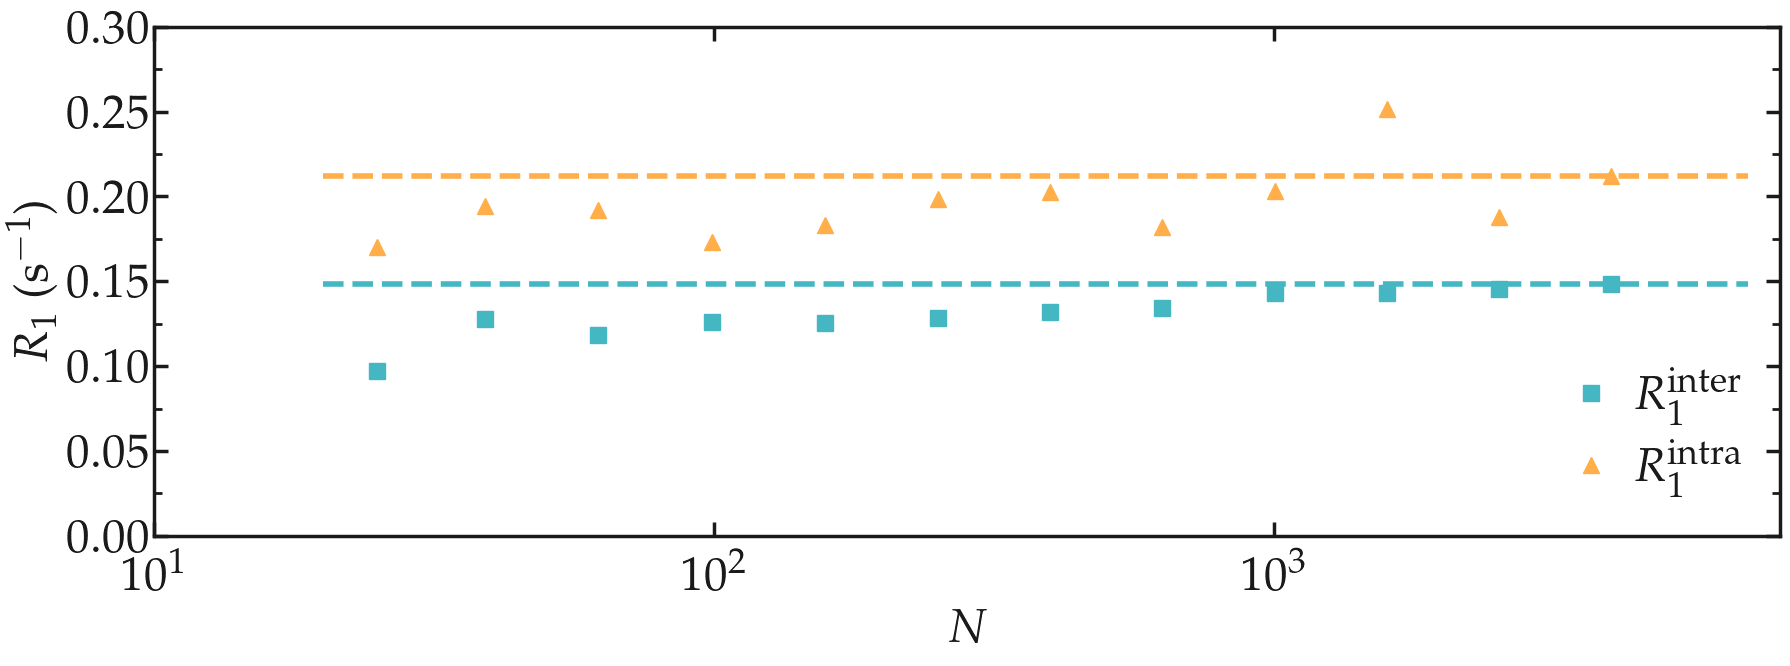

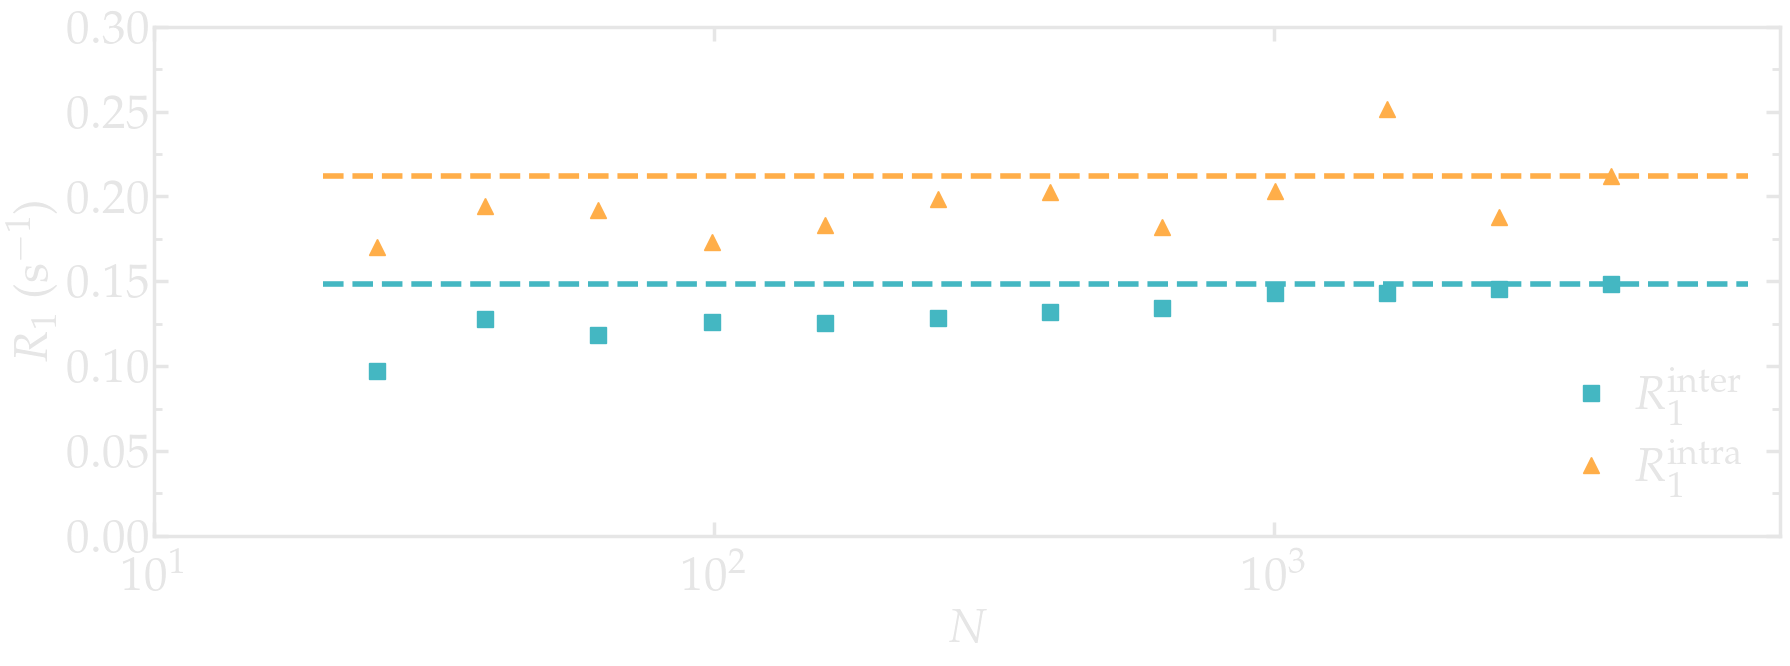

In [ ]:
filename = "effect_L_on_R1"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,12))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    x = np.linspace(20, 7000)
    ax[-1].semilogx(all_N, R10_inter_vs_N, "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$R_1^\mathrm{inter}$')
    ax[-1].semilogx(x, x*0 + R10_inter_vs_N[-1],
                    "--", color=colors["mycyan"],
                    markersize = 12, linewidth=4)
    ax[-1].semilogx(all_N, R10_intra_vs_N, "^", color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$R_1^\mathrm{intra}$')
    ax[-1].semilogx(x, x*0 + R10_intra_vs_N[-1],
                    "--", color=colors["myorange"],
                    markersize = 12, linewidth=4)
    complete_panel(ax[-1], r'$N$', r'$R_1$ (s$^{-1}$)',
                   legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(10, 8000), y_boundaries=(0, 0.3))
    # x_ticks=np.arange(-1, 0.2, 0.2)
    # add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)

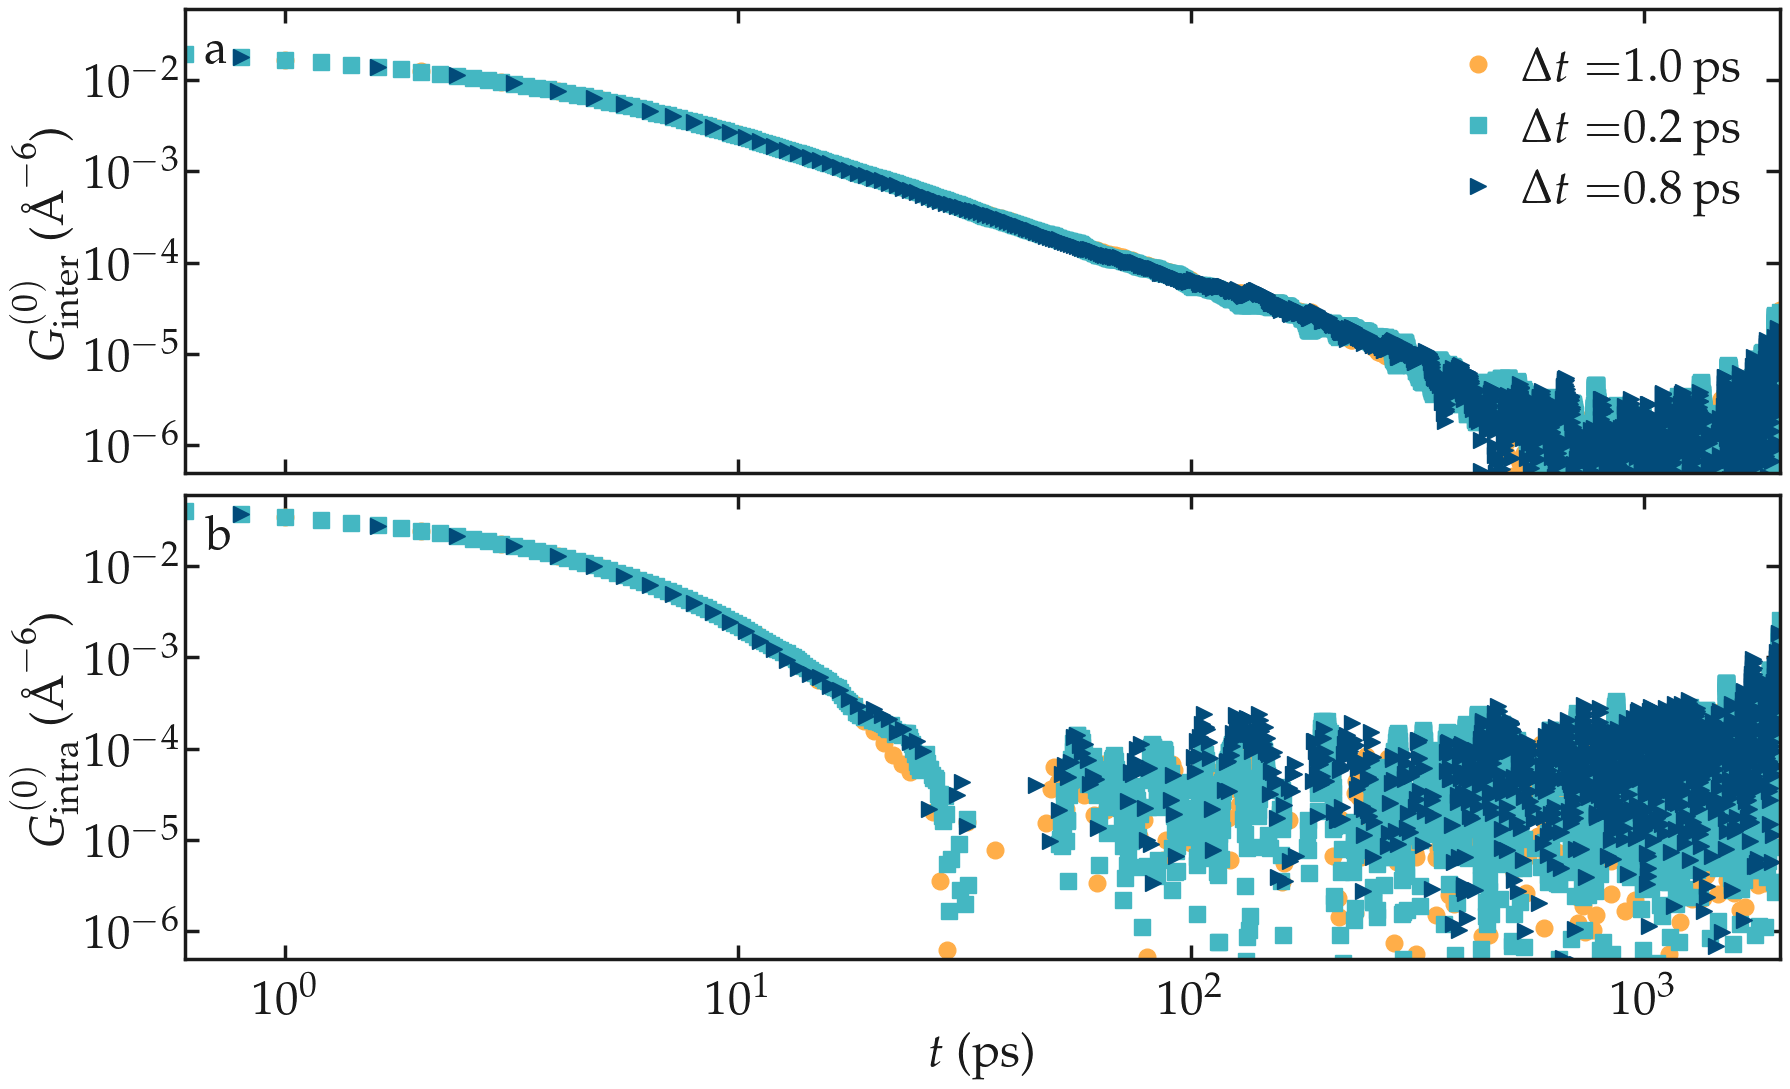

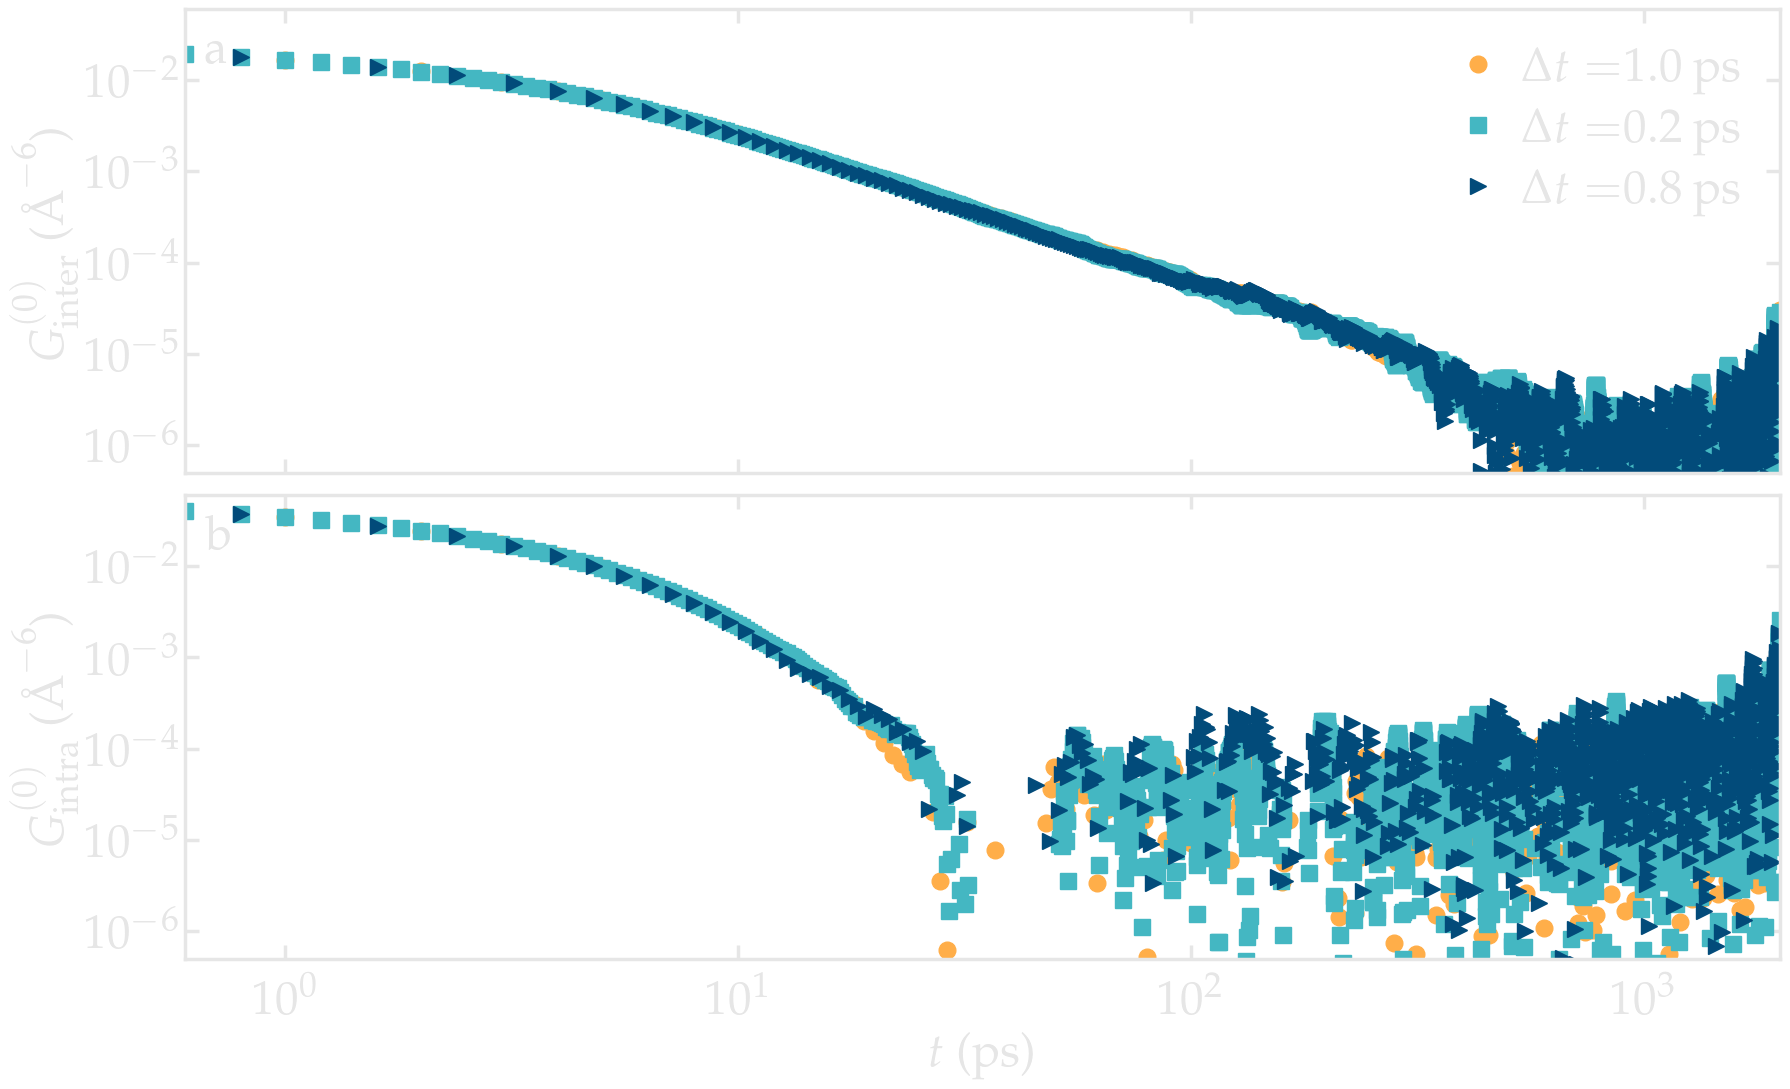

In [ ]:
filename = "effect_dt_on_G"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,11))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    x = np.linspace(0.15, 40)
    id = 6
    ax[-1].loglog(t_vs_dt[id], gij_inter_vs_dt[id], "o", color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$\Delta t = $' + str(all_dt[id]) + ' ps')
    id = 0
    ax[-1].loglog(t_vs_dt[id], gij_inter_vs_dt[id], "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$\Delta t = $' + str(all_dt[id]) + ' ps')
    id = 2
    ax[-1].loglog(t_vs_dt[id], gij_inter_vs_dt[id], ">", color=colors["mydarkblue"],
                    markersize = 12, linewidth=4, label=r'$\Delta t = $' + str(all_dt[id]) + ' ps')
    complete_panel(ax[-1], None, r'$G_\mathrm{inter}^{(0)}$ ($\textrm{\AA}^{-6}$)',
                   legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(0.6, 2e3), y_boundaries=(5e-7, 0.06))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    x = np.linspace(0.15, 40)
    id = 6
    ax[-1].loglog(t_vs_dt[id], gij_intra_vs_dt[id], "o", color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$\Delta t = $' + str(all_dt[id]) + ' ps')
    id = 0
    ax[-1].loglog(t_vs_dt[id], gij_intra_vs_dt[id], "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$\Delta t = $' + str(all_dt[id]) + ' ps')
    id = 2
    ax[-1].loglog(t_vs_dt[id], gij_intra_vs_dt[id], ">", color=colors["mydarkblue"],
                    markersize = 12, linewidth=4, label=r'$\Delta t = $' + str(all_dt[id]) + ' ps')
    complete_panel(ax[-1], r'$t$ (ps)', r'$G_\mathrm{intra}^{(0)}$ ($\textrm{\AA}^{-6}$)',
                   legend=False, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(0.6, 2e3), y_boundaries=(5e-7, 0.06))
    # x_ticks=np.arange(-1, 0.2, 0.2)
    add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)

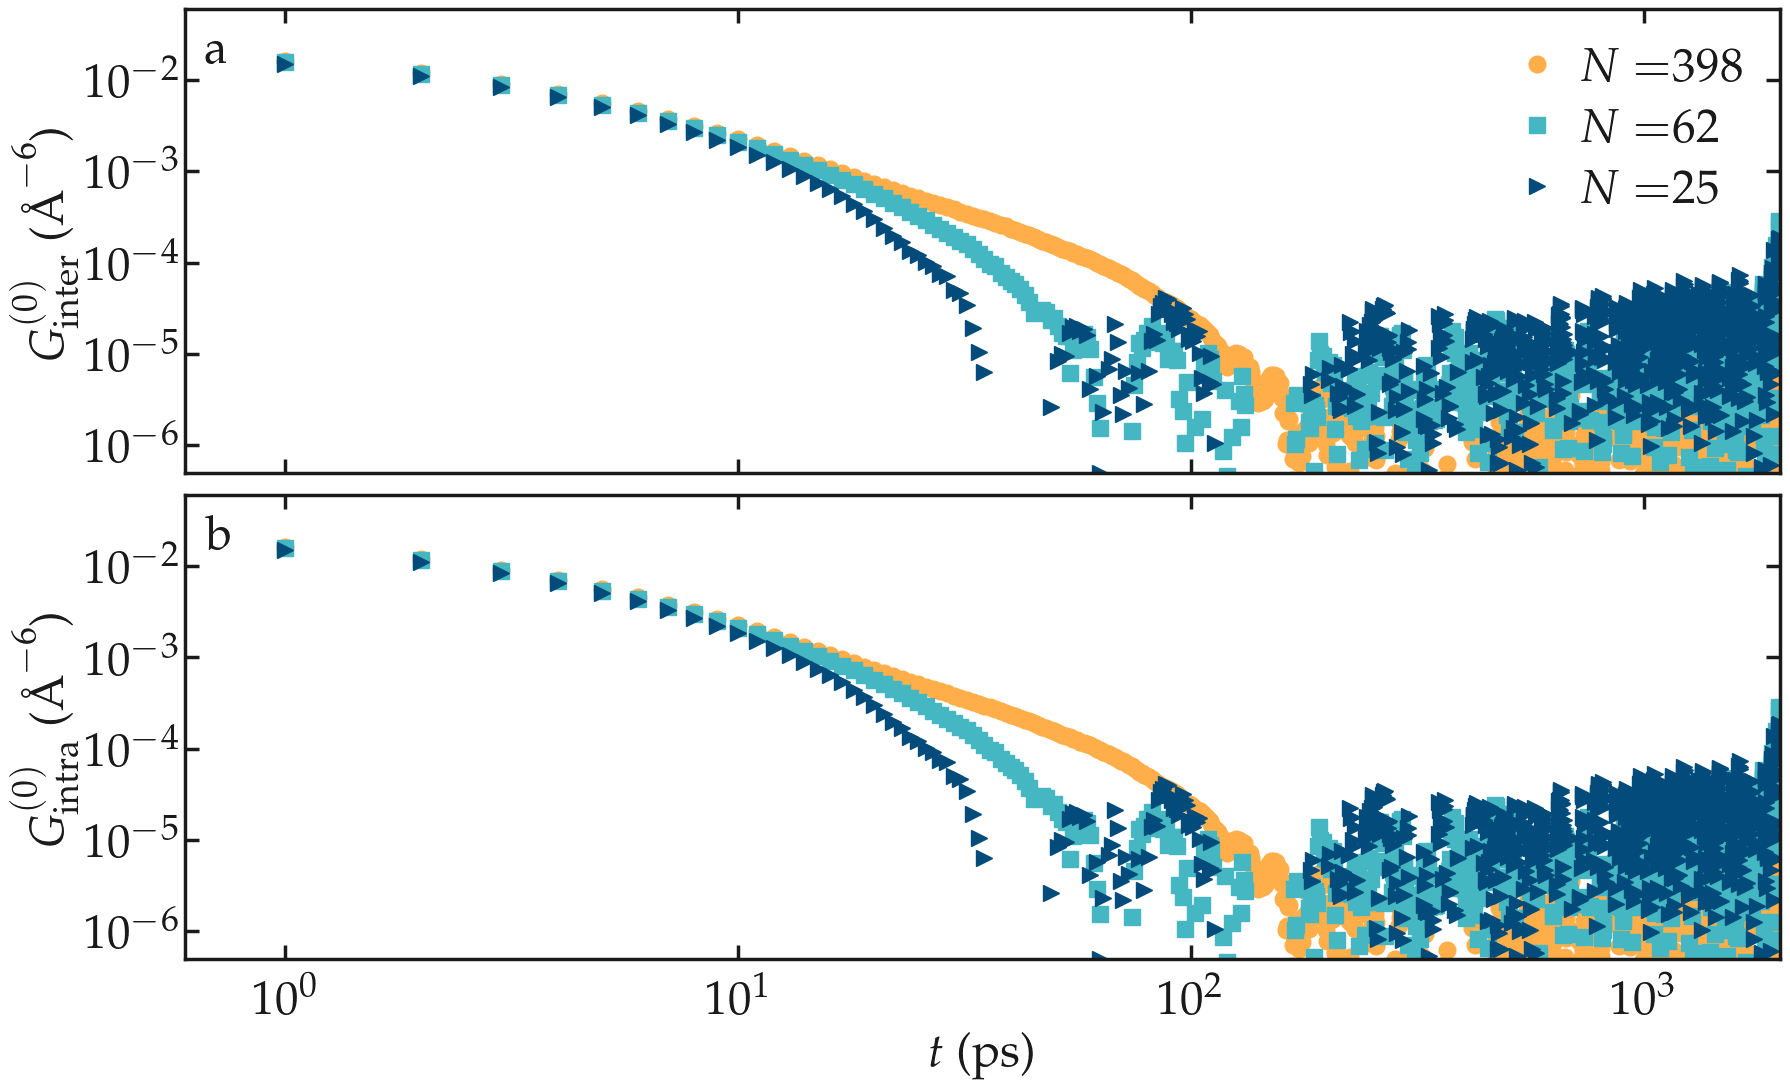

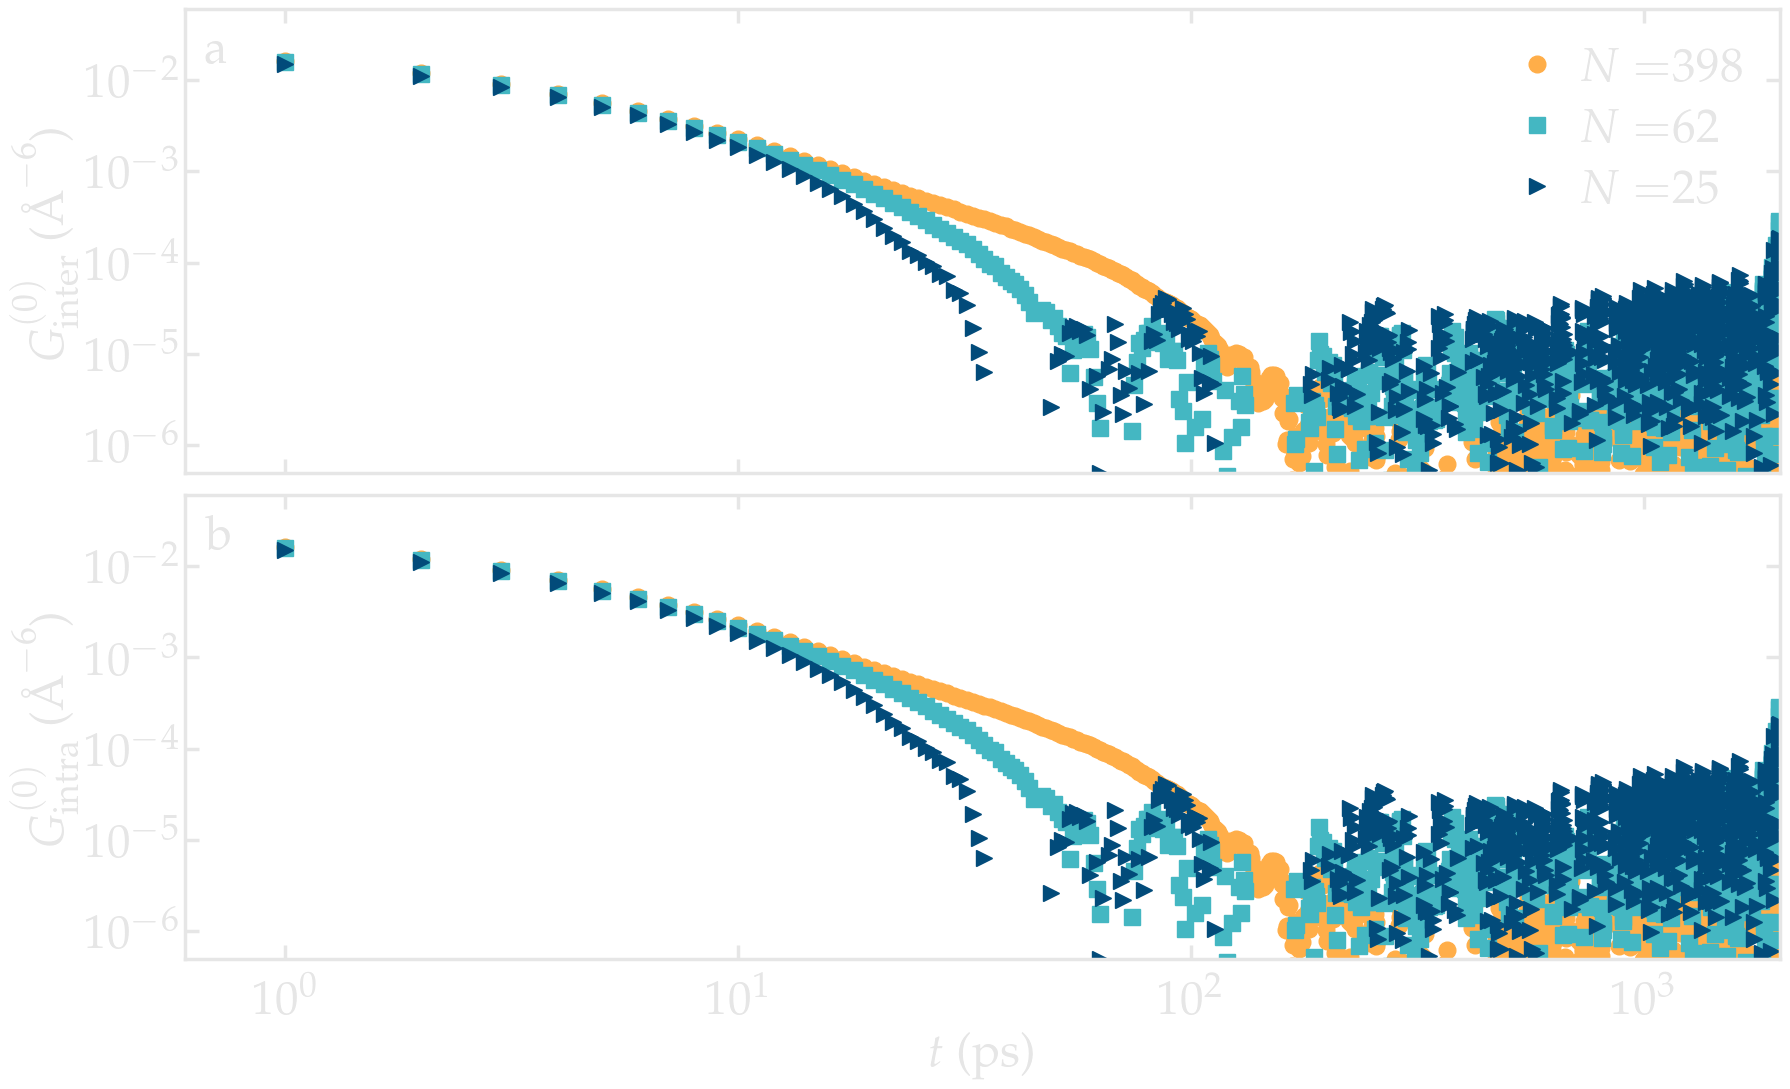

In [ ]:
filename = "effect_N_on_G"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,11))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    x = np.linspace(0.15, 40)
    id = 6
    ax[-1].loglog(t_vs_N[id], gij_inter_vs_N[id], "o", color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$N = $' + str(np.int32(all_N[id])))
    id = 2
    ax[-1].loglog(t_vs_N[id], gij_inter_vs_N[id], "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$N = $' + str(np.int32(all_N[id])))
    id = 0
    ax[-1].loglog(t_vs_N[id], gij_inter_vs_N[id], ">", color=colors["mydarkblue"],
                    markersize = 12, linewidth=4, label=r'$N = $' + str(np.int32(all_N[id])))
    complete_panel(ax[-1], None, r'$G_\mathrm{inter}^{(0)}$ ($\textrm{\AA}^{-6}$)',
                   legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(0.6, 2e3), y_boundaries=(5e-7, 0.06))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    x = np.linspace(0.15, 40)
    id = 6
    ax[-1].loglog(t_vs_N[id], gij_inter_vs_N[id], "o", color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$N = $' + str(np.int32(all_N[id])))
    id = 2
    ax[-1].loglog(t_vs_N[id], gij_inter_vs_N[id], "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$N = $' + str(np.int32(all_N[id])))
    id = 0
    ax[-1].loglog(t_vs_N[id], gij_inter_vs_N[id], ">", color=colors["mydarkblue"],
                    markersize = 12, linewidth=4, label=r'$N = $' + str(np.int32(all_N[id])))
    complete_panel(ax[-1], r'$t$ (ps)', r'$G_\mathrm{intra}^{(0)}$ ($\textrm{\AA}^{-6}$)',
                   legend=False, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(0.6, 2e3), y_boundaries=(5e-7, 0.06))
    # x_ticks=np.arange(-1, 0.2, 0.2)
    add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)